In [ ]:
import pandas as pd
df = pd.read_csv('/content/BIKE DETAILS.csv')
df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


In [ ]:
# What is the range of selling prices in the dataset

selling_price_range = df['selling_price'].max() - df['selling_price'].min()
print("Range of selling prices:", selling_price_range)

Range of selling prices: 755000


In [ ]:
#  What is the median selling price for bikes in the dataset

median_selling_price = df['selling_price'].median()
print("Median selling price:", median_selling_price)


Median selling price: 45000.0


In [ ]:
#  What is the most common seller type

common_seller_type = df['seller_type'].mode()[0]
print("Most common seller type:", common_seller_type)

Most common seller type: Individual


In [ ]:
# How many bikes have driven more than 50,000 kilometers

num_bikes_over_50k_km = df[df['km_driven'] > 50000].shape[0]
print("Number of bikes driven more than 50,000 kilometers:", num_bikes_over_50k_km)

Number of bikes driven more than 50,000 kilometers: 170


In [ ]:
# What is the average km_driven value for each ownership type

average_km_driven_by_ownership = df.groupby('owner')['km_driven'].mean()
print("Average km_driven value for each ownership type:\n", average_km_driven_by_ownership)

Average km_driven value for each ownership type:
 owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


In [ ]:
# What proportion of bikes are from the year 2015 or older

bikes_2015_or_older = df[df['year'] <= 2015]
proportion_2015_or_older = len(bikes_2015_or_older) / len(df)
print("Proportion of bikes from the year 2015 or older:", proportion_2015_or_older)

Proportion of bikes from the year 2015 or older: 0.5664467483506126


In [ ]:
#  What is the trend of missing values across the datase

missing_values_trend = df.isnull().sum()
print("Trend of missing values across the dataset:\n", missing_values_trend)

Trend of missing values across the dataset:
 name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64


In [ ]:
# What is the highest ex_showroom_price recorded, and for which bike

highest_ex_showroom_price_row = df.loc[df['ex_showroom_price'].idxmax()]
highest_ex_showroom_price = highest_ex_showroom_price_row['ex_showroom_price']
bike_with_highest_ex_showroom_price = highest_ex_showroom_price_row['name']

print(f"The highest ex-showroom price recorded is {highest_ex_showroom_price} for the bike: {bike_with_highest_ex_showroom_price}")

The highest ex-showroom price recorded is 1278000.0 for the bike: Harley-Davidson Street Bob


In [ ]:
#  What is the total number of bikes listed by each seller type

bike_count_by_seller_type = df.groupby('seller_type').size()
print("Total number of bikes listed by each seller type:\n", bike_count_by_seller_type)

Total number of bikes listed by each seller type:
 seller_type
Dealer           6
Individual    1055
dtype: int64


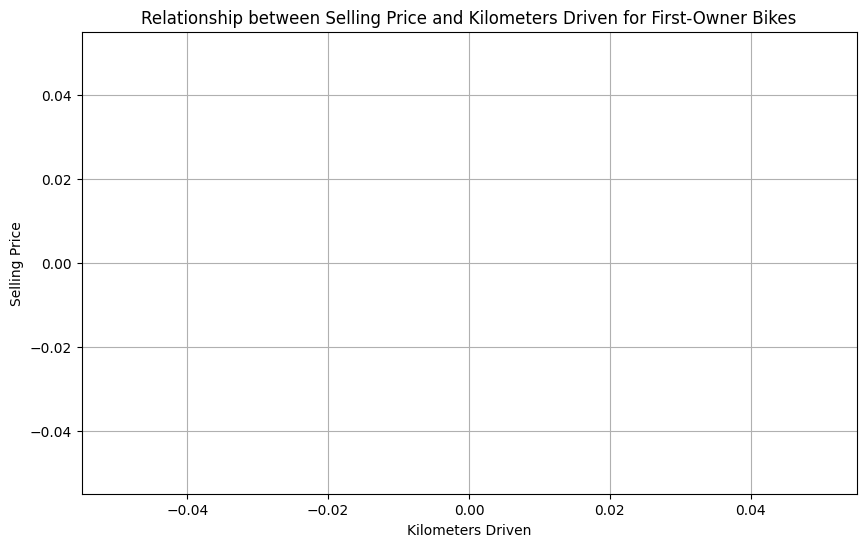


Correlation between selling price and km_driven for first-owner bikes: nan


In [ ]:
# What is the relationship between selling_price and km_driven for first-owner bikes

import matplotlib.pyplot as plt
import seaborn as sns

# Filter for first owner bikes
first_owner_df = df[df['owner'] == 'First Owner'].copy()

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=first_owner_df, x='km_driven', y='selling_price')
plt.title('Relationship between Selling Price and Kilometers Driven for First-Owner Bikes')
plt.xlabel('Kilometers Driven')
plt.ylabel('Selling Price')
plt.grid(True)
plt.show()

# Calculate the correlation coefficient
correlation = first_owner_df['selling_price'].corr(first_owner_df['km_driven'])
print(f"\nCorrelation between selling price and km_driven for first-owner bikes: {correlation:.2f}")

Outliers in km_driven column (using IQR method):
                                  name  selling_price  year seller_type  \
91           Honda Activa [2000-2015]          22989  2012  Individual   
93                      Suzuki GS150R          30000  2010  Individual   
115           Hero Honda Passion Plus           7500  2004  Individual   
135            Hero Honda CBZ extreme          20000  2007  Individual   
154                Hero Xtreme Sports          22000  2014  Individual   
184              Honda CB Unicorn 160          75000  2015  Individual   
363                Hero Honda CD100SS          10000  1997  Individual   
470          Honda Activa [2000-2015]          23000  2009  Individual   
474     Hero Honda Passion PRO [2012]          12000  2012  Individual   
477          Honda Activa [2000-2015]          25000  2009  Individual   
511                Hero Splendor Plus          12000  2007  Individual   
535              Hero Honda CD Deluxe          12000  2007  In

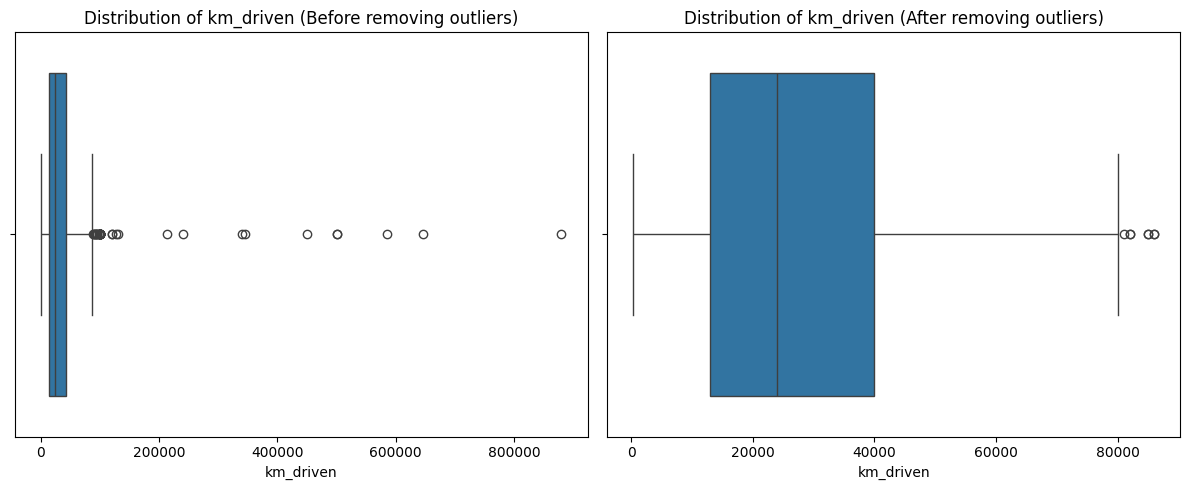

In [ ]:
# Identify and remove outliers in the km_driven column using the IQR method

# Calculate Q1 and Q3
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['km_driven'] < lower_bound) | (df['km_driven'] > upper_bound)]
print("Outliers in km_driven column (using IQR method):\n", outliers)

# Remove outliers
df_no_outliers = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)].copy()
print("\nDataFrame after removing outliers:\n", df_no_outliers.head())
print("\nShape of original DataFrame:", df.shape)
print("Shape of DataFrame after removing outliers:", df_no_outliers.shape)

# Optional: Visualize the distribution before and after removing outliers
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x=df['km_driven'])
plt.title('Distribution of km_driven (Before removing outliers)')

plt.subplot(1, 2, 2)
sns.boxplot(x=df_no_outliers['km_driven'])
plt.title('Distribution of km_driven (After removing outliers)')

plt.tight_layout()
plt.show()

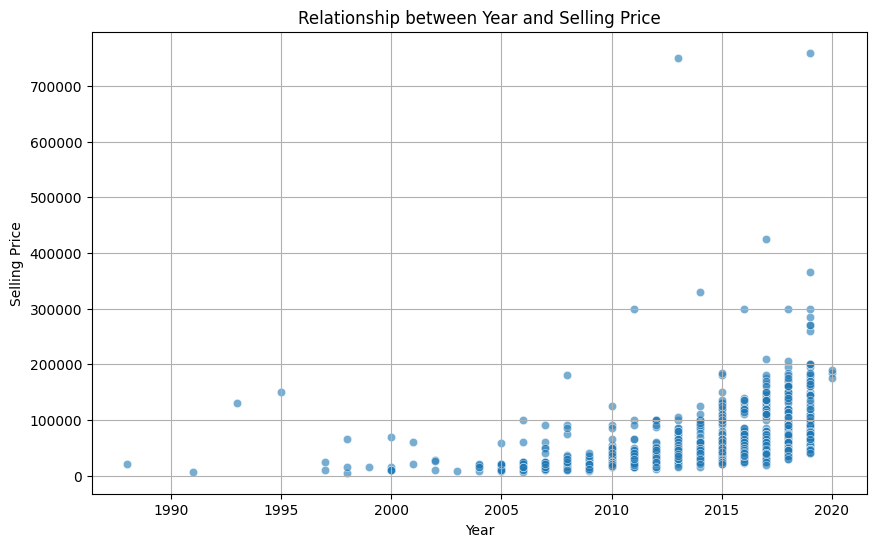


Correlation between year and selling price: 0.40


In [ ]:
#  Perform a bivariate analysis to visualize the relationship between year and selling_price

# Bivariate Analysis: Relationship between year and selling_price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='year', y='selling_price', alpha=0.6)
plt.title('Relationship between Year and Selling Price')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.grid(True)
plt.show()

# Optional: Calculate the correlation coefficient
correlation_year_selling_price = df['year'].corr(df['selling_price'])
print(f"\nCorrelation between year and selling price: {correlation_year_selling_price:.2f}")

Average depreciation in selling price based on bike's age:
bike_age
5     183333.333333
6     119689.511628
7      87660.374046
8      78894.736842
9      58469.018692
10     56500.000000
11     48668.131868
12     51136.986301
13     35748.400000
14     35655.721311
15     31793.333333
16     22267.857143
17     34289.285714
18     24927.586207
19     23380.000000
20     16978.571429
21     15100.000000
22      8000.000000
23     20666.666667
24     40000.000000
25     20833.333333
26     15000.000000
27     28333.333333
28     17500.000000
30    150000.000000
32    130000.000000
34      6000.000000
37     20000.000000
Name: selling_price, dtype: float64


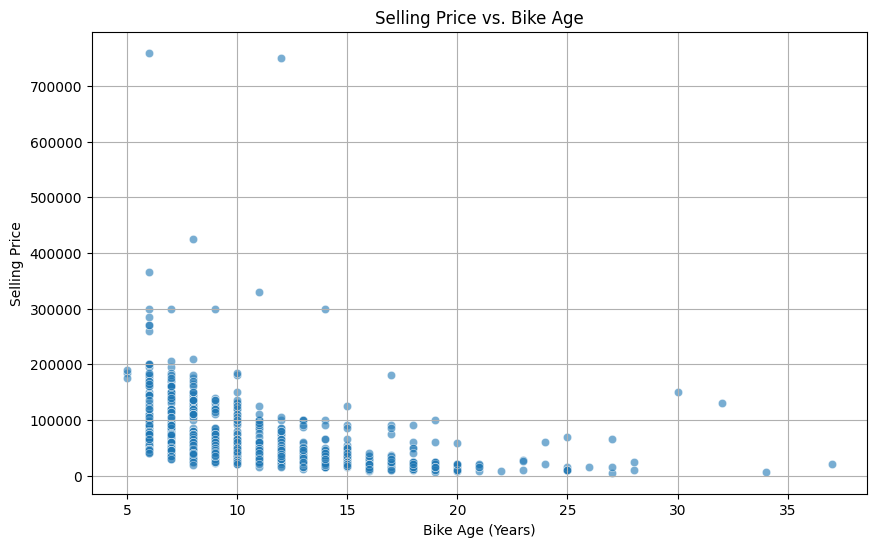

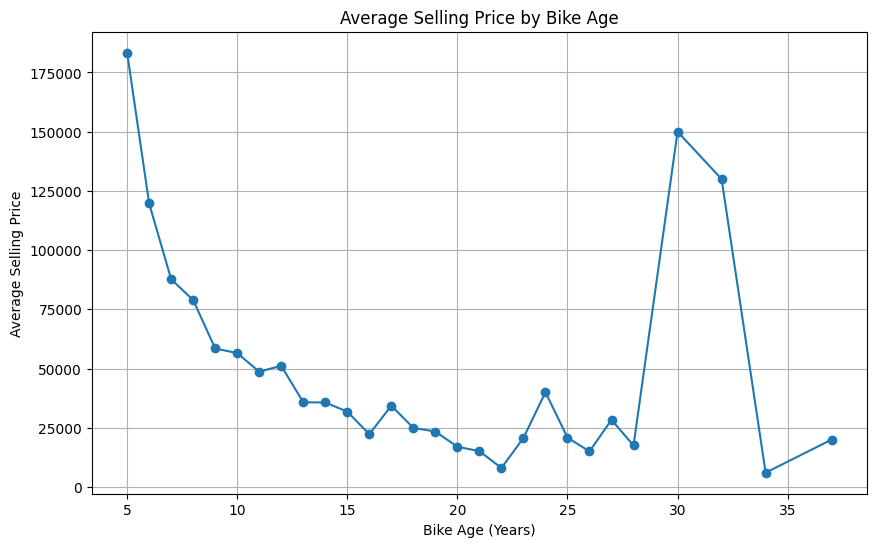

In [ ]:
# What is the average depreciation in selling price based on the bike's age (current year - manufacturing year)

import datetime

current_year = datetime.datetime.now().year
df['bike_age'] = current_year - df['year']

average_depreciation_by_age = df.groupby('bike_age')['selling_price'].mean()

print("Average depreciation in selling price based on bike's age:")
print(average_depreciation_by_age)

# Optional: Visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='bike_age', y='selling_price', alpha=0.6)
plt.title('Selling Price vs. Bike Age')
plt.xlabel('Bike Age (Years)')
plt.ylabel('Selling Price')
plt.grid(True)
plt.show()

# Optional: Plot the average depreciation
plt.figure(figsize=(10, 6))
average_depreciation_by_age.plot(kind='line', marker='o')
plt.title('Average Selling Price by Bike Age')
plt.xlabel('Bike Age (Years)')
plt.ylabel('Average Selling Price')
plt.grid(True)
plt.show()

In [ ]:
#  Which bike names are priced significantly above the average price for their manufacturing year

# Calculate the average selling price for each manufacturing year
average_price_by_year = df.groupby('year')['selling_price'].transform('mean')

# Define a threshold for "significantly above average" (e.g., 1.5 times the average)
# You can adjust this threshold based on your definition of "significantly"
price_threshold_multiplier = 1.5

# Identify bikes where the selling price is significantly above the average for their year
bikes_above_average = df[df['selling_price'] > average_price_by_year * price_threshold_multiplier]

# Get the names of these bikes
bike_names_above_average = bikes_above_average['name'].unique()

print(f"Bike names priced significantly above the average price for their manufacturing year (>{price_threshold_multiplier}x the year's average):")
for name in bike_names_above_average:
  print(f"- {name}")

# Optional: Display the DataFrame for bikes significantly above average
print("\nDetails of bikes significantly above the average price for their manufacturing year:")
print(bikes_above_average[['name', 'year', 'selling_price', 'ex_showroom_price']])


Bike names priced significantly above the average price for their manufacturing year (>1.5x the year's average):
- Royal Enfield Classic Gunmetal Grey
- Royal Enfield Bullet 350 [2007-2011]
- Yamaha YZF R3
- Jawa Standard
- Royal Enfield Thunderbird 350
- Honda CBR-250R
- Bajaj Dominar 400
- KTM 390 Duke
- Royal Enfield Electra 5 S
- Royal Enfield Bullet 350
- Royal Enfield Electra 4 S
- Mahindra Mojo XT300
- Hero Honda Karizma ZMR [2010]
- Royal Enfield Thunderbird 350X
- Royal Enfield Classic Desert Storm
- Yamaha FZ25
- UM Renegade Commando
- Royal Enfield Classic 350
- Royal Enfield Continental GT 650
- Harley-Davidson Street Bob
- KTM 390 Duke ABS [2013-2016]
- Royal Enfield Classic 500
- KTM RC 390
- Bajaj Pulsar 150
- KTM RC 200
- Honda CB Unicorn 150
- Royal Enfield Bullet 500
- Bajaj Dominar 400 [2018]
- Royal Enfield Interceptor 650
- Royal Enfield Machismo
- KTM 250 Duke
- Kawasaki Ninja 650 [2018-2019]
- Kawasaki Ninja 250R
- Suzuki GSX S750
- Yamaha Rx
- Yamaha Fazer Dlx
-

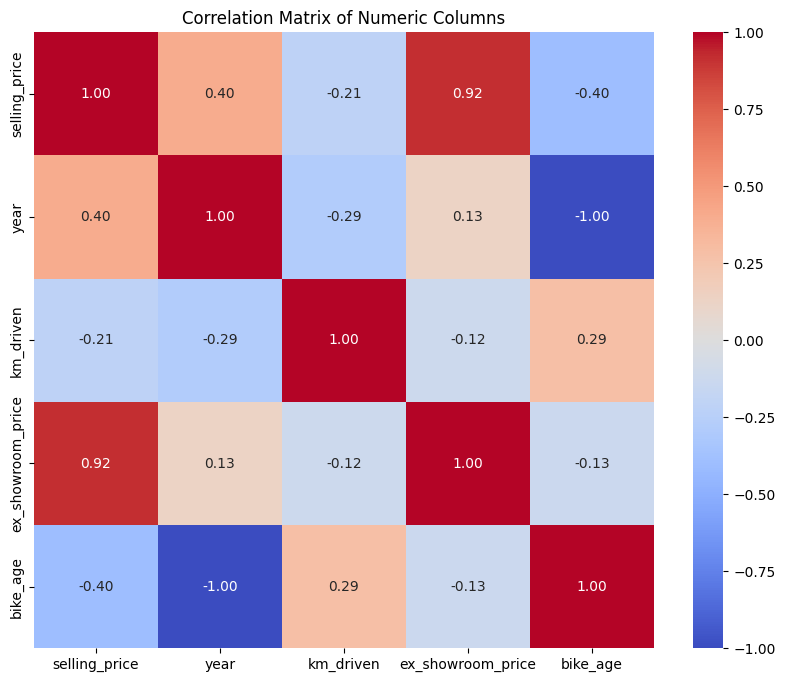

In [ ]:
 # Develop a correlation matrix for numeric columns and visualize it using a heatmap

# Select only numeric columns for the correlation matrix
numeric_cols = df.select_dtypes(include=['number'])

# Develop the correlation matrix
correlation_matrix = numeric_cols.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Columns')
plt.show()

# EDA 2

In [ ]:
import pandas as pd
df = pd.read_csv('/content/Car Sale.csv')
df

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23901,C_CND_023902,12/31/2023,Martin,Male,13500,C & M Motors Inc,Plymouth,Voyager,Overhead Camshaft,Manual,Red,12000,60504-7114,Passenger,8583598,Pasco
23902,C_CND_023903,12/31/2023,Jimmy,Female,900000,Ryder Truck Rental and Leasing,Chevrolet,Prizm,DoubleÂ Overhead Camshaft,Auto,Black,16000,06457-3834,Hardtop,7914229,Middletown
23903,C_CND_023904,12/31/2023,Emma,Male,705000,Chrysler of Tri-Cities,BMW,328i,Overhead Camshaft,Manual,Red,21000,99301-3882,Sedan,7659127,Scottsdale
23904,C_CND_023905,12/31/2023,Victoire,Male,13500,Chrysler Plymouth,Chevrolet,Metro,DoubleÂ Overhead Camshaft,Auto,Black,31000,53546-9427,Passenger,6030764,Austin


In [ ]:
#  What is the average selling price of cars for each dealer, and how does it compare across different dealers

# Group by dealer and calculate the average selling price
average_selling_price_by_dealer = df1.groupby('Dealer Name')['Price'].mean()

print("Average selling price by dealer:")
print(average_selling_price_by_dealer)

# Compare average selling prices across different dealers (optional visualization)
plt.figure(figsize=(12, 6))
average_selling_price_by_dealer.sort_values(ascending=False).plot(kind='bar')
plt.title('Average Selling Price of Cars by Dealer')
plt.xlabel('Dealer Name')
plt.ylabel('Average Selling Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
#  Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends

# Extract the car brand from the 'Car Name' column
df['Brand'] = df['Car Name'].apply(lambda x: x.split()[0])

# Calculate the standard deviation of prices for each brand
price_variation_by_brand = df.groupby('Brand')['Price'].std().sort_values(ascending=False)

# Identify the brand with the highest variation
brand_highest_variation = price_variation_by_brand.index[0]
highest_variation_value = price_variation_by_brand.iloc[0]

print(f"The car brand with the highest variation in prices is: {brand_highest_variation}")
print(f"The standard deviation of prices for {brand_highest_variation} is: {highest_variation_value:.2f}")

# Interpretation:
print("\nInterpretation:")
print(f"The high variation in prices for {brand_highest_variation} suggests that this brand likely offers a wide range of models.")
print("These models probably span different segments (e.g., economy, luxury, sports) or have a significant difference in features, age, or condition, leading to a larger spread in selling prices.")
print("This could indicate a diverse product portfolio or a pricing strategy that caters to different customer segments.")


In [ ]:
# What is the distribution of car prices for each transmission type, and how do the interquartile ranges
# compare

# Get the selling prices for each transmission type
transmission_prices = [df[df['Transmission'] == trans]['Price'] for trans in df['Transmission'].unique()]

# Create box plots to visualize the distribution
plt.figure(figsize=(10, 6))
sns.boxplot(x='Transmission', y='Price', data=df)
plt.title('Distribution of Car Prices by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Selling Price')
plt.show()

# Calculate interquartile ranges (IQR) for each transmission type
iqr_by_transmission = df.groupby('Transmission')['Price'].apply(lambda x: x.quantile(0.75) - x.quantile(0.25))

print("\nInterquartile Range of Prices by Transmission Type:")
print(iqr_by_transmission)

# Compare IQRs
print("\nComparison of Interquartile Ranges:")
print(f"Manual Transmission IQR: {iqr_by_transmission.get('Manual', 'N/A'):.2f}")
print(f"Automatic Transmission IQR: {iqr_by_transmission.get('Automatic', 'N/A'):.2f}")
# You can add more comparisons if there are other transmission types

In [ ]:
#  What is the distribution of car prices across different regions

if 'Dealer Name' in df.columns:
    # Create box plots to visualize the distribution of prices by Dealer Name
    plt.figure(figsize=(15, 8))
    sns.boxplot(x='Dealer Name', y='Price', data=df)
    plt.title('Distribution of Car Prices by Dealer')
    plt.xlabel('Dealer Name')
    plt.ylabel('Selling Price')
    plt.xticks(rotation=90) # Rotate labels for better readability if many dealers
    plt.tight_layout()
    plt.show()

    # Optional: Calculate summary statistics for prices by dealer
    price_summary_by_dealer = df.groupby('Dealer Name')['Price'].describe()
    print("\nSummary Statistics of Car Prices by Dealer:\n", price_summary_by_dealer)

else:
    print("The DataFrame does not contain a 'Dealer Name' column to analyze price distribution across dealers.")



The DataFrame does not contain a 'Dealer Name' column to analyze price distribution across dealers.


Distribution of cars based on body styles:
Body Style
SUV          6374
Hatchback    6128
Sedan        4488
Passenger    3945
Hardtop      2971
Name: count, dtype: int64


<ipython-input-26-cf3a00ed4a36>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Body Style', order=body_style_distribution.index, palette='viridis')


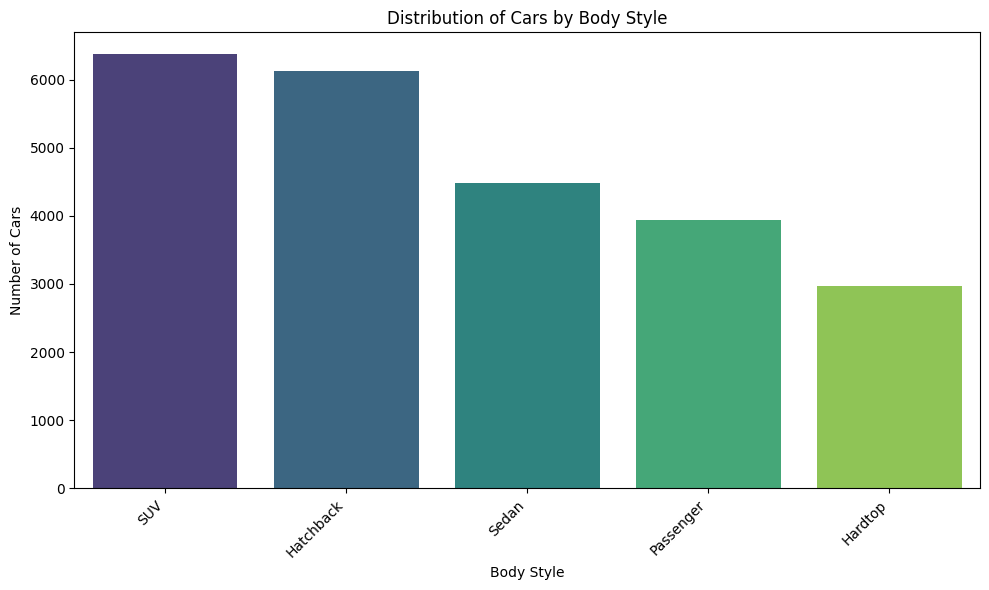

In [ ]:
# What is the distribution of cars based on body styles


# Check if 'Body Style' column exists
if 'Body Style' in df.columns:
    # Calculate the distribution of body styles
    body_style_distribution = df['Body Style'].value_counts()

    print("Distribution of cars based on body styles:")
    print(body_style_distribution)

    # Visualize the distribution using a bar plot
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x='Body Style', order=body_style_distribution.index, palette='viridis')
    plt.title('Distribution of Cars by Body Style')
    plt.xlabel('Body Style')
    plt.ylabel('Number of Cars')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

else:
    print("The DataFrame does not contain a 'Body Style' column to analyze distribution.")

In [ ]:
#  How does the average selling price of cars vary by customer gender and annual income

if 'Gender' in df.columns and 'Annual Income' in df.columns:
  # Group by gender and income and calculate the average selling price
  average_price_by_gender_income = df.groupby(['Gender', 'Annual Income'])['Price'].mean().unstack()

  print("Average selling price by customer gender and annual income:")
  print(average_price_by_gender_income)

  # Visualize the variation using a heatmap or bar plot
  plt.figure(figsize=(10, 6))
  sns.heatmap(average_price_by_gender_income, annot=True, cmap='YlGnBu', fmt=".0f")
  plt.title('Average Car Selling Price by Gender and Annual Income')
  plt.xlabel('Annual Income')
  plt.ylabel('Gender')
  plt.show()

else:
  print(
      "The DataFrame does not contain 'Gender' or 'Annual Income' columns to"
      " analyze selling price variation."
  )

In [ ]:
# What is the distribution of car prices by region, and how does the number of cars sold vary by region

if 'Dealer Name' in df.columns:
    # Calculate the distribution of car prices by dealer (as region indicator)
    print("Distribution of car prices by Dealer (Region):")
    print(df.groupby('Dealer Name')['Price'].describe())

    # Visualize the distribution of car prices by dealer
    plt.figure(figsize=(15, 8))
    sns.boxplot(x='Dealer Name', y='Price', data=df)
    plt.title('Distribution of Car Prices by Dealer (Region)')
    plt.xlabel('Dealer Name (Region)')
    plt.ylabel('Selling Price')
    plt.xticks(rotation=90)  # Rotate labels for better readability
    plt.tight_layout()
    plt.show()

    # Calculate the number of cars sold (listed) by each dealer (region)
    cars_sold_by_region = df['Dealer Name'].value_counts()
    print("\nNumber of cars sold (listed) by Dealer (Region):")
    print(cars_sold_by_region)

    # Visualize the number of cars sold by dealer
    plt.figure(figsize=(15, 8))
    cars_sold_by_region.plot(kind='bar', color='skyblue')
    plt.title('Number of Cars Sold by Dealer (Region)')
    plt.xlabel('Dealer Name (Region)')
    plt.ylabel('Number of Cars Sold')
    plt.xticks(rotation=90)  # Rotate labels for better readability
    plt.tight_layout()
    plt.show()

else:
    print("The DataFrame does not contain a 'Dealer Name' column to analyze price distribution and sales by region.")

The DataFrame does not contain a 'Dealer Name' column to analyze price distribution and sales by region.


In [ ]:
# How does the average car price differ between cars with different engine sizes

if 'Engine Size' in df.columns and pd.api.types.is_numeric_dtype(df['Engine Size']):
    # Calculate the average car price for each unique engine size
    average_price_by_engine_size = df.groupby('Engine Size')['Price'].mean().sort_values(ascending=False)

    print("Average car price by engine size:")
    print(average_price_by_engine_size)

    # Optional: Visualize the difference using a bar plot
    plt.figure(figsize=(10, 6))
    average_price_by_engine_size.plot(kind='bar')
    plt.title('Average Car Price by Engine Size')
    plt.xlabel('Engine Size')
    plt.ylabel('Average Selling Price')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # Optional: Visualize using a scatter plot to see individual data points and the trend
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='Engine Size', y='Price', alpha=0.6)
    plt.title('Car Price vs. Engine Size')
    plt.xlabel('Engine Size')
    plt.ylabel('Selling Price')
    plt.grid(True)
    plt.show()

else:
    print("The DataFrame does not contain a numeric 'Engine Size' column to analyze price differences.")

The DataFrame does not contain a numeric 'Engine Size' column to analyze price differences.


In [ ]:
# How do car prices vary based on the customer’s annual income bracket


if 'Annual Income' in df.columns and pd.api.types.is_numeric_dtype(df['Annual Income']) and 'Price' in df.columns:
    # Define income brackets (you can adjust these based on the data distribution)
    income_bins = [0, 20000, 40000, 60000, 80000, 100000, df['Annual Income'].max()]
    income_labels = [
        '0-20k',
        '20k-40k',
        '40k-60k',
        '60k-80k',
        '80k-100k',
        '100k+'
    ]

    # Create a new column for income bracket
    df['Income Bracket'] = pd.cut(
        df['Annual Income'], bins=income_bins, labels=income_labels, right=False
    )

    # Calculate the average car price for each income bracket
    average_price_by_income_bracket = (
        df.groupby('Income Bracket')['Price'].mean().reindex(income_labels)
    ) # Use reindex to maintain order

    print("Average car price by customer annual income bracket:")
    print(average_price_by_income_bracket)

    # Optional: Visualize the variation using a bar plot
    plt.figure(figsize=(10, 6))
    average_price_by_income_bracket.plot(kind='bar', color='teal')
    plt.title('Average Car Price by Annual Income Bracket')
    plt.xlabel('Annual Income Bracket')
    plt.ylabel('Average Selling Price')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

else:
    print(
        "The DataFrame does not contain 'Annual Income' (numeric) or 'Price'"
        " columns to analyze price variation by income bracket."
    )


In [ ]:
#  What are the top 5 car models with the highest number of sales, and how does their price distribution look

# Count the occurrences of each car model
model_counts = df['Car Name'].value_counts()

# Get the top 5 models by sales (count)
top_5_models = model_counts.head(5).index

print("Top 5 Car Models by Number of Sales:")
for model in top_5_models:
  print(f"- {model}: {model_counts[model]} sales")

# Filter the DataFrame to include only the top 5 models
df_top_5_models = df[df['Car Name'].isin(top_5_models)].copy()

# Visualize the price distribution for the top 5 models using box plots
plt.figure(figsize=(12, 7))
sns.boxplot(x='Car Name', y='Price', data=df_top_5_models, order=top_5_models, palette='viridis')
plt.title('Price Distribution of Top 5 Car Models by Sales')
plt.xlabel('Car Model')
plt.ylabel('Selling Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Optional: Print summary statistics for the price of the top 5 models
print("\nSummary Statistics of Selling Price for Top 5 Car Models:")
print(df_top_5_models.groupby('Car Name')['Price'].describe())


In [ ]:
#  How does car price vary with engine size across different car colors, and which colors have the highest price variation

if (
    'Engine Size' in df.columns
    and 'Color' in df.columns
    and 'Price' in df.columns
    and pd.api.types.is_numeric_dtype(df['Engine Size'])
):
  # How does car price vary with engine size across different car colors
  plt.figure(figsize=(12, 8))
  sns.scatterplot(data=df, x='Engine Size', y='Price', hue='Color', alpha=0.6)
  plt.title('Car Price vs. Engine Size by Color')
  plt.xlabel('Engine Size')
  plt.ylabel('Selling Price')
  plt.legend(title='Color', bbox_to_anchor=(1.05, 1), loc='upper left')
  plt.grid(True)
  plt.tight_layout()
  plt.show()

  # Which colors have the highest price variation (using standard deviation)
  price_variation_by_color = df.groupby('Color')['Price'].std().sort_values(
      ascending=False
  )

  print("Price Variation (Standard Deviation) by Car Color:")
  print(price_variation_by_color)

  print("\nColors with the highest price variation:")
  print(price_variation_by_color.head()) # Print the top colors

else:
  print(
      "The DataFrame does not contain 'Engine Size' (numeric), 'Color', or"
      " 'Price' columns to perform this analysis."
  )


The DataFrame does not contain 'Engine Size' (numeric), 'Color', or 'Price' columns to perform this analysis.


In [ ]:
# Is there any seasonal trend in car sales based on the date of sale

if 'Sale Date' in df.columns and 'Price' in df.columns:
  # Ensure 'Sale Date' is in datetime format
  df['Sale Date'] = pd.to_datetime(df['Sale Date'])

  # Extract month and year for seasonal analysis
  df['Sale Month'] = df['Sale Date'].dt.month
  df['Sale Year'] = df['Sale Date'].dt.year

  # Group by month to see average price per month across all years
  average_price_by_month = df.groupby('Sale Month')['Price'].mean()

  print("Average Selling Price by Month:")
  print(average_price_by_month)

  # Visualize average price by month
  plt.figure(figsize=(10, 6))
  average_price_by_month.plot(kind='line', marker='o')
  plt.title('Average Car Selling Price by Month')
  plt.xlabel('Month')
  plt.ylabel('Average Selling Price')
  plt.xticks(range(1, 13), [
      'Jan',
      'Feb',
      'Mar',
      'Apr',
      'May',
      'Jun',
      'Jul',
      'Aug',
      'Sep',
      'Oct',
      'Nov',
      'Dec',
  ])
  plt.grid(True)
  plt.show()

  # Optional: Visualize price distribution by month using box plots
  plt.figure(figsize=(12, 7))
  sns.boxplot(x='Sale Month', y='Price', data=df)
  plt.title('Distribution of Car Prices by Month')
  plt.xlabel('Month')
  plt.ylabel('Selling Price')
  plt.xticks(range(12), [
      'Jan',
      'Feb',
      'Mar',
      'Apr',
      'May',
      'Jun',
      'Jul',
      'Aug',
      'Sep',
      'Oct',
      'Nov',
      'Dec',
  ])
  plt.show()

  # Optional: Group by month and year to see trends over time
  average_price_by_month_year = (
      df.groupby(['Sale Year', 'Sale Month'])['Price'].mean().reset_index()
  )
  average_price_by_month_year['Sale Date'] = pd.to_datetime(
      average_price_by_month_year['Sale Year'].astype(str)
      + '-'
      + average_price_by_month_year['Sale Month'].astype(str)
  )
  average_price_by_month_year = average_price_by_month_year.sort_values(
      'Sale Date'
  )

  plt.figure(figsize=(12, 6))
  sns.lineplot(
      data=average_price_by_month_year,
      x='Sale Date',
      y='Price',
      marker='o',
  )
  plt.title('Average Car Selling Price Over Time (Monthly)')
  plt.xlabel('Date')
  plt.ylabel('Average Selling Price')
  plt.grid(True)
  plt.show()


else:
  print(
      "The DataFrame does not contain 'Sale Date' or 'Price' columns to analyze"
      " seasonal trends."
  )


The DataFrame does not contain 'Sale Date' or 'Price' columns to analyze seasonal trends.


In [ ]:
# How does the car price distribution change when considering different combinations of body style and transmission type

if 'Body Style' in df.columns and 'Transmission' in df.columns and 'Price' in df.columns:
  plt.figure(figsize=(14, 8))
  sns.boxplot(x='Body Style', y='Price', hue='Transmission', data=df)
  plt.title('Car Price Distribution by Body Style and Transmission Type')
  plt.xlabel('Body Style')
  plt.ylabel('Selling Price')
  plt.xticks(rotation=45, ha='right')
  plt.legend(title='Transmission')
  plt.tight_layout()
  plt.show()

  # Optional: Group by Body Style and Transmission to see summary statistics
  price_summary_by_style_transmission = df.groupby(['Body Style', 'Transmission'])[
      'Price'
  ].describe()
  print(
      '\nSummary Statistics of Car Prices by Body Style and Transmission Type:'
  )
  print(price_summary_by_style_transmission)

else:
  print(
      'The DataFrame does not contain "Body Style", "Transmission", or "Price"'
      ' columns to analyze this distribution.'
  )


The DataFrame does not contain "Body Style", "Transmission", or "Price" columns to analyze this distribution.


In [ ]:
#  What is the correlation between car price, engine size, and annual income of customers, and how do these features interact

# Select the relevant columns
relevant_cols = ['Price', 'Engine Size', 'Annual Income']

# Check if these columns exist in the DataFrame and are numeric
if all(col in df.columns and pd.api.types.is_numeric_dtype(df[col]) for col in relevant_cols):
    # Calculate the correlation matrix for these features
    correlation_relevant_features = df[relevant_cols].corr()

    print("Correlation Matrix between Car Price, Engine Size, and Annual Income:")
    print(correlation_relevant_features)

    # Visualize the correlation using a heatmap
    plt.figure(figsize=(6, 5))
    sns.heatmap(correlation_relevant_features, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Heatmap')
    plt.show()

    # Analyze interactions through scatter plots and potentially pair plots
    print("\nAnalyzing interactions through scatter plots:")

    # Scatter plot of Price vs. Engine Size
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='Engine Size', y='Price', alpha=0.6)
    plt.title('Car Price vs. Engine Size')
    plt.xlabel('Engine Size')
    plt.ylabel('Car Price')
    plt.grid(True)
    plt.show()

    # Scatter plot of Price vs. Annual Income
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='Annual Income', y='Price', alpha=0.6)
    plt.title('Car Price vs. Annual Income')
    plt.xlabel('Annual Income')
    plt.ylabel('Car Price')
    plt.grid(True)
    plt.show()

    # Pair plot to see relationships and distributions among all three
    sns.pairplot(df[relevant_cols])
    plt.suptitle('Pair Plot of Price, Engine Size, and Annual Income', y=1.02)
    plt.show()

    print("\nInterpretation of Correlations and Interactions:")
    print(f"- Correlation between Price and Engine Size: {correlation_relevant_features.loc['Price', 'Engine Size']:.2f}")
    print(f"- Correlation between Price and Annual Income: {correlation_relevant_features.loc['Price', 'Annual Income']:.2f}")
    print(f"- Correlation between Engine Size and Annual Income: {correlation_relevant_features.loc['Engine Size', 'Annual Income']:.2f}")

    print("\nKey Observations from Correlation Matrix and Plots:")
    # Interpret based on the correlation values
    if abs(correlation_relevant_features.loc['Price', 'Engine Size']) > 0.3: # Example threshold for moderate correlation
        print(f"- There appears to be a {'positive' if correlation_relevant_features.loc['Price', 'Engine Size'] > 0 else 'negative'} correlation between Car Price and Engine Size.")
        print("  Larger engine sizes tend to be associated with higher/lower car prices.")
    else:
         print("- There appears to be a weak or negligible correlation between Car Price and Engine Size.")

    if abs(correlation_relevant_features.loc['Price', 'Annual Income']) > 0.3:
        print(f"- There appears to be a {'positive' if correlation_relevant_features.loc['Price', 'Annual Income'] > 0 else 'negative'} correlation between Car Price and Annual Income.")
        print("  Customers with higher/lower annual income tend to buy more/less expensive cars.")
    else:
        print("- There appears to be a weak or negligible correlation between Car Price and Annual Income.")

    if abs(correlation_relevant_features.loc['Engine Size', 'Annual Income']) > 0.3:
        print(f"- There appears to be a {'positive' if correlation_relevant_features.loc['Engine Size', 'Annual Income'] > 0 else 'negative'} correlation between Engine Size and Annual Income.")
        print("  Customers with higher/lower annual income tend to buy cars with larger/smaller engine sizes.")
    else:
         print("- There appears to be a weak or negligible correlation between Engine Size and Annual Income.")

    print("\nInteraction Interpretation (from scatter plots and pair plot):")
    print("- Examine the scatter plots and pair plot for patterns. For example:")
    print("  - Does the relationship between Price and Engine Size look different for customers with different income levels (visualized if you color the Price vs Engine Size plot by Income bracket, which requires creating brackets)?")
    print("  - Are higher income customers clustered towards the upper right of the Engine Size vs. Price plot?")
    # Add more specific interpretations based on visual inspection of the plots
    # For a deeper interaction analysis, one might consider 3D plots or regression models with interaction terms.

else:
    print(
        "The DataFrame does not contain the necessary numeric columns ('Price',"
        " 'Engine Size', 'Annual Income') to analyze this correlation."
    )

The DataFrame does not contain the necessary numeric columns ('Price', 'Engine Size', 'Annual Income') to analyze this correlation.


In [ ]:
#  How does the average car price vary across different car models and engine types

if (
    'Engine Size' in df.columns
    and 'Body Style' in df.columns
    and 'Price' in df.columns
    and pd.api.types.is_numeric_dtype(df['Engine Size'])
):
  # Group by Body Style and Engine Size and calculate the average price
  average_price_by_model_engine = (
      df.groupby(['Body Style', 'Engine Size'])['Price'].mean().reset_index()
  )

  print("Average car price by Body Style and Engine Size:")
  print(average_price_by_model_engine)

  # Visualize the variation using a grouped bar plot or similar
  plt.figure(figsize=(14, 8))
  sns.barplot(
      x='Body Style',
      y='Price',
      hue='Engine Size',
      data=average_price_by_model_engine,
      palette='viridis',
  )
  plt.title('Average Car Price by Body Style and Engine Size')
  plt.xlabel('Body Style')
  plt.ylabel('Average Selling Price')
  plt.xticks(rotation=45, ha='right')
  plt.legend(title='Engine Size')
  plt.tight_layout()
  plt.show()

  # Optional: Further analysis of how price varies within each body style based on engine size
  for body_style in df['Body Style'].unique():
    df_subset = df[df['Body Style'] == body_style].copy()
    if not df_subset.empty and pd.api.types.is_numeric_dtype(
        df_subset['Engine Size']
    ):
      print(f"\nAnalysis for Body Style: {body_style}")
      average_price_within_style = (
          df_subset.groupby('Engine Size')['Price'].mean().sort_values()
      )
      print(average_price_within_style)

      if len(df_subset['Engine Size'].unique()) > 1:
        plt.figure(figsize=(10, 6))
        sns.scatterplot(data=df_subset, x='Engine Size', y='Price', alpha=0.6)
        plt.title(f'Car Price vs. Engine Size for {body_style}')
        plt.xlabel('Engine Size')
        plt.ylabel('Selling Price')
        plt.grid(True)
        plt.show()
      else:
        print(f"Only one engine size available for {body_style}.")

else:
  print(
      "The DataFrame does not contain the necessary columns ('Body Style',"
      " 'Engine Size', 'Price') or 'Engine Size' is not numeric to perform this"
      " analysis."
  )

# EDA 3

In [ ]:
import pandas as pd
df = pd.read_csv('/content/amazon.csv')
df



,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,₹379,₹919,59%,4,"1,090",SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"₹2,280","₹3,045",25%,4.1,"4,118","230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the me

In [ ]:
#  What is the average rating for each product category

print("Columns in the DataFrame:")
print(df.columns)

# Assuming a column like 'overall_rating' or 'avg_rating' or similar exists
# and represents a numerical rating. Let's try to find a relevant column.
rating_col = None
for col in ['overall_rating', 'avg_rating', 'rating', 'customer_reviews']:
    if col in df.columns:
        rating_col = col
        break

if rating_col is None:
    print(
        "\nCould not find a standard rating column like 'overall_rating',"
        " 'avg_rating', or 'rating'."
    )
    print("Please check your CSV file for the correct rating column name.")
    print("Available columns are:", df.columns.tolist())
else:
    print(f"\nUsing '{rating_col}' as the rating column.")

    # Ensure the category column exists
    if 'category' in df.columns:

        try:
            # Attempt to convert the rating column to numeric, handling potential errors
            df[rating_col] = pd.to_numeric(df[rating_col], errors='coerce')
        except Exception as e:
            print(
                f"\nError converting rating column '{rating_col}' to numeric:"
                f" {e}"
            )
            print("Attempting alternative cleaning based on common patterns...")
            try:
                # Try removing ' out of 5 stars' if that's the format
                if df[rating_col].dtype == 'object' and df[rating_col].str.contains(' out of 5 stars').any():
                     df[rating_col] = df[rating_col].str.replace(' out of 5 stars', '', regex=False)
                     df[rating_col] = pd.to_numeric(df[rating_col], errors='coerce')
                     print("Successfully cleaned ' out of 5 stars' and converted to numeric.")
                elif df[rating_col].dtype == 'object':
                     # If still an object type, try a simple numeric conversion with coercion
                     df[rating_col] = pd.to_numeric(df[rating_col], errors='coerce')
                     print("Attempted simple numeric conversion with coercion.")


            except Exception as e_clean:
                 print(f"Cleaning attempt failed: {e_clean}")
                 print("Please inspect the format of your rating column manually.")


        # Drop rows where rating could not be converted to numeric
        df_cleaned = df.dropna(subset=[rating_col]).copy()

        if df_cleaned[rating_col].dtype != 'number':
             print(f"\nRating column '{rating_col}' is not numeric even after cleaning attempts.")
             print("Cannot calculate average rating.")
        else:

            # Calculate the average rating for each product category
            average_rating_by_category = df_cleaned.groupby('category')[rating_col].mean()

            # Sort for better readability (optional)
            average_rating_by_category = average_rating_by_category.sort_values(ascending=False)

            print("\nAverage rating for each product category:")
            print(average_rating_by_category)

            # Optional: Visualize the average ratings
            if len(average_rating_by_category) > 0:
                 plt.figure(figsize=(12, 7))
                 average_rating_by_category.plot(kind='bar')
                 plt.title(f'Average {rating_col} by Product Category')
                 plt.xlabel('Product Category')
                 plt.ylabel(f'Average {rating_col}')
                 plt.xticks(rotation=90, ha='right')
                 plt.tight_layout()
                 plt.show()
            else:
                 print("\nNo data available after cleaning to calculate average rating.")

    else:
        print("The DataFrame does not contain a 'category' column.")
        print("Please check your CSV file for the correct category column name.")
        print("Available columns are:", df.columns.tolist())

In [ ]:
# What are the top rating_count products by category

rating_count_col = None
for col in ['rating_count', 'number_of_reviews', 'ratings_count']:
    if col in df.columns:
        rating_count_col = col
        break

if rating_count_col is None:
    print(
        "\nCould not find a standard rating count column like 'rating_count',"
        " 'number_of_reviews', or 'ratings_count'."
    )
    print("Please check your CSV file for the correct rating count column name.")
    print("Available columns are:", df.columns.tolist())
else:
    print(f"\nUsing '{rating_count_col}' as the rating count column.")

    # Ensure the category column exists and the product identifier column exists (e.g., 'product_name')
    if 'category' in df.columns and 'product_name' in df.columns:

        try:
            # Attempt to convert the rating count column to numeric, handling potential errors
            df[rating_count_col] = pd.to_numeric(
                df[rating_count_col], errors='coerce'
            )
        except Exception as e:
            print(
                f"\nError converting rating count column '{rating_count_col}' to"
                f" numeric: {e}"
            )
            print("Please inspect the format of your rating count column manually.")

        # Drop rows where rating count could not be converted to numeric or is missing
        df_cleaned = df.dropna(subset=[rating_count_col, 'category', 'product_name']).copy()

        if df_cleaned[rating_count_col].dtype != 'number':
            print(
                f"\nRating count column '{rating_count_col}' is not numeric even"
                ' after cleaning attempts.'
            )
            print("Cannot determine top rating count products.")
        else:
            # Group by category and find the product with the maximum rating count in each
            def get_top_product(group):
                # Find the row with the maximum rating count in the group
                top_product_row = group.loc[group[rating_count_col].idxmax()]
                return pd.Series({
                    'Product Name': top_product_row['product_name'],
                    rating_count_col: top_product_row[rating_count_col],
                })

            top_products_by_category = (
                df_cleaned.groupby('category').apply(get_top_product)
            )


            print(f"\nTop Product by {rating_count_col} for each category:")
            print(top_products_by_category)

            # Optional: Get top N products per category (e.g., top 3)
            N = 3
            print(f"\nTop {N} Products by {rating_count_col} for each category:")

            def get_top_n_products(group, n=N):
                # Sort the group by rating count in descending order and take the top N
                top_n = group.sort_values(by=rating_count_col, ascending=False).head(n)
                return top_n[['product_name', rating_count_col]]

            top_n_products_by_category = (
                df_cleaned.groupby('category').apply(get_top_n_products)
            )

            print(top_n_products_by_category)

    else:
        missing_cols = []
        if 'category' not in df.columns:
            missing_cols.append("'category'")
        if 'product_name' not in df.columns:
            missing_cols.append("'product_name'")
        print(
            f"The DataFrame does not contain the following required columns:"
            f" {', '.join(missing_cols)}."
        )
        print(
            'Please check your CSV file for the correct column names for category'
            ' and product identifier.'
        )
        print("Available columns are:", df.columns.tolist())

In [ ]:
# What is the distribution of discounted prices vs. actual prices

if 'discounted_price' in df.columns and 'actual_price' in df.columns:
    # Ensure the price columns are numeric, coercing errors
    df['discounted_price'] = pd.to_numeric(df['discounted_price'], errors='coerce')
    df['actual_price'] = pd.to_numeric(df['actual_price'], errors='coerce')

    # Drop rows where price data is missing or couldn't be converted
    df_prices = df.dropna(subset=['discounted_price', 'actual_price']).copy()

    if df_prices.empty:
        print("No valid data available for both discounted and actual prices after cleaning.")
    else:
        # Visualize the distribution
        plt.figure(figsize=(10, 6))
        sns.histplot(df_prices, x='actual_price', color='skyblue', label='Actual Price', kde=True, stat='density', common_norm=False)
        sns.histplot(df_prices, x='discounted_price', color='lightcoral', label='Discounted Price', kde=True, stat='density', common_norm=False)
        plt.title('Distribution of Discounted vs. Actual Prices')
        plt.xlabel('Price')
        plt.ylabel('Density')
        plt.legend()
        plt.grid(axis='y', alpha=0.75)
        plt.show()

        # Optional: Calculate summary statistics for comparison
        print("\nSummary Statistics for Prices:")
        print(df_prices[['actual_price', 'discounted_price']].describe())

        # Optional: Calculate the average discount percentage
        df_prices['discount_percentage'] = ((df_prices['actual_price'] - df_prices['discounted_price']) / df_prices['actual_price']) * 100
        # Handle cases where actual_price might be 0 or the same as discounted_price (no discount)
        df_prices['discount_percentage'] = df_prices['discount_percentage'].replace([np.inf, -np.inf], np.nan).fillna(0)


        print(f"\nAverage Discount Percentage: {df_prices['discount_percentage'].mean():.2f}%")


        # Optional: Visualize discount percentage distribution
        plt.figure(figsize=(8, 5))
        sns.histplot(df_prices, x='discount_percentage', bins=30, kde=True)
        plt.title('Distribution of Discount Percentage')
        plt.xlabel('Discount Percentage')
        plt.ylabel('Frequency')
        plt.grid(axis='y', alpha=0.75)
        plt.show()

In [ ]:
# How does the average discount percentage vary across categories

import numpy as np

if (
    'discounted_price' in df.columns
    and 'actual_price' in df.columns
    and 'category' in df.columns
):
    # Ensure the price columns are numeric, coercing errors
    df['discounted_price'] = pd.to_numeric(df['discounted_price'], errors='coerce')
    df['actual_price'] = pd.to_numeric(df['actual_price'], errors='coerce')

    # Drop rows where price data is missing or couldn't be converted, or category is missing
    df_prices_category = df.dropna(subset=['discounted_price', 'actual_price', 'category']).copy()

    # Calculate discount percentage, handling division by zero or same prices
    df_prices_category['discount_percentage'] = ((df_prices_category['actual_price'] - df_prices_category['discounted_price']) / df_prices_category['actual_price']) * 100
    df_prices_category['discount_percentage'] = df_prices_category['discount_percentage'].replace([np.inf, -np.inf], np.nan).fillna(0) # Replace inf with NaN, then fill NaN with 0


    if df_prices_category.empty:
        print(
            "No valid data available for discounted price, actual price, and"
            ' category after cleaning.'
        )
    else:
        # Calculate the average discount percentage for each category
        average_discount_by_category = df_prices_category.groupby('category')[
            'discount_percentage'
        ].mean()

        # Sort for better readability
        average_discount_by_category = average_discount_by_category.sort_values(
            ascending=False
        )

        print("Average discount percentage by category:")
        print(average_discount_by_category)

        # Optional: Visualize the average discount percentages
        if len(average_discount_by_category) > 0:
            plt.figure(figsize=(12, 7))
            average_discount_by_category.plot(kind='bar', color='lightgreen')
            plt.title('Average Discount Percentage by Product Category')
            plt.xlabel('Product Category')
            plt.ylabel('Average Discount Percentage (%)')
            plt.xticks(rotation=90, ha='right')
            plt.tight_layout()
            plt.show()
        else:
            print("\nNo data available after cleaning to calculate average discount percentage by category.")

else:
    missing_cols = []
    if 'discounted_price' not in df.columns:
        missing_cols.append("'discounted_price'")
    if 'actual_price' not in df.columns:
        missing_cols.append("'actual_price'")
    if 'category' not in df.columns:
        missing_cols.append("'category'")
    print(
        'The DataFrame does not contain the following required columns to analyze'
        f" discount variation by category: {', '.join(missing_cols)}."
    )
    print("Available columns are:", df.columns.tolist())

Most popular product names (Top 10):
product_name
Fire-Boltt Ninja Call Pro Plus 1.83" Smart Watch with Bluetooth Calling, AI Voice Assistance, 100 Sports Modes IP67 Rating, 240*280 Pixel High Resolution                                                  5
Fire-Boltt Phoenix Smart Watch with Bluetooth Calling 1.3",120+ Sports Modes, 240*240 PX High Res with SpO2, Heart Rate Monitoring & IP67 Rating                                                           4
Amazonbasics Nylon Braided Usb-C To Lightning Cable, Fast Charging Mfi Certified Smartphone, Iphone Charger (6-Foot, Dark Grey)                                                                            3
Duracell USB Lightning Apple Certified (Mfi) Braided Sync & Charge Cable For Iphone, Ipad And Ipod. Fast Charging Lightning Cable, 3.9 Feet (1.2M) - Black                                                 3
Flix Micro Usb Cable For Smartphone (Black)                                                                                       

<ipython-input-45-8e9f77ae1298>:17: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


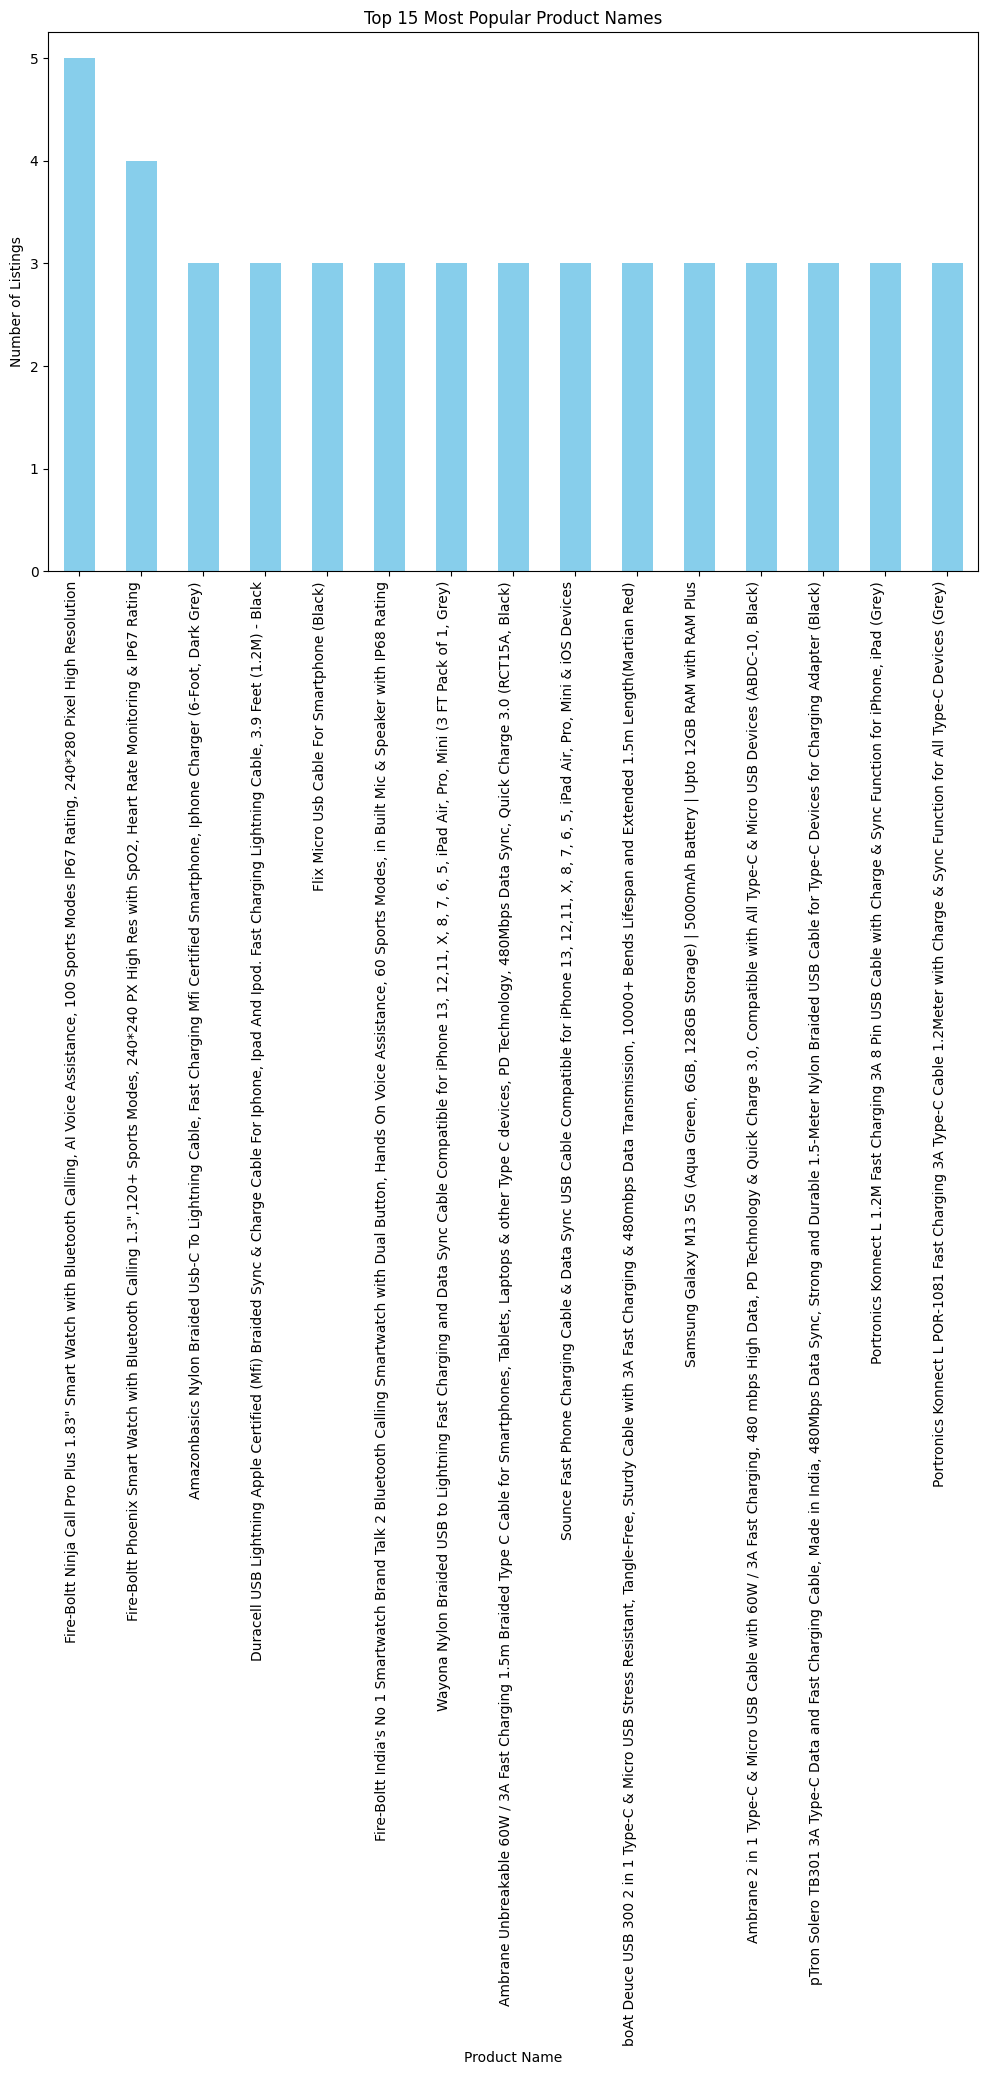

In [ ]:
#  What are the most popular product names

product_name_counts = df['product_name'].value_counts()

# Display the most popular product names (e.g., top 10)
print("Most popular product names (Top 10):")
print(product_name_counts.head(10))

# Optional: Visualize the top N most popular products
N = 15 # Number of top products to visualize
plt.figure(figsize=(12, 7))
product_name_counts.head(N).plot(kind='bar', color='skyblue')
plt.title(f'Top {N} Most Popular Product Names')
plt.xlabel('Product Name')
plt.ylabel('Number of Listings')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

Most popular product keywords (Top 20):
- black: 468
- cable: 401
- usb: 390
- charging: 246
- fast: 211
- smart: 172
- white: 155
- type: 149
- compatible: 142
- data: 135
- wireless: 118
- led: 118
- water: 110
- remote: 108
- pro: 107
- heater: 106
- bluetooth: 105
- electric: 94
- braided: 92
- battery: 92


<ipython-input-46-c105bda34f0b>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Keyword', data=top_keywords_df, palette='viridis')


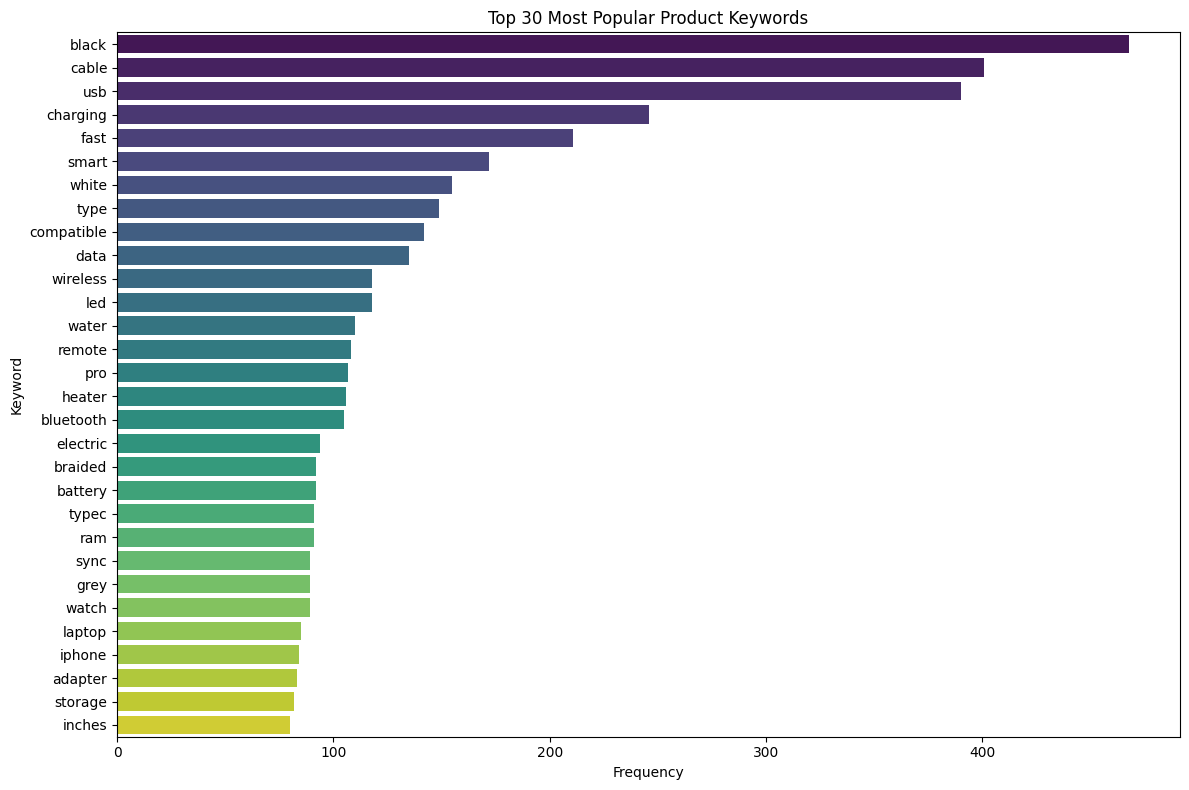

In [ ]:
# What are the most popular product keywords

from collections import Counter
import re

def get_keywords(product_name):
  # Convert to lowercase and remove non-alphanumeric characters (except spaces)
  cleaned_name = re.sub(r'[^a-z0-9\s]', '', str(product_name).lower())
  # Split into words and remove common stop words (optional, can add more)
  words = cleaned_name.split()
  stop_words = set(['the', 'a', 'an', 'and', 'for', 'with', 'in', 'on', 'of', 'is', 'it'])
  keywords = [word for word in words if word not in stop_words and len(word) > 2] # Filter short words
  return keywords

all_keywords = []
# Apply the function to each product name and extend the list
df['product_name'].apply(lambda x: all_keywords.extend(get_keywords(x)))

# Count the frequency of each keyword
keyword_counts = Counter(all_keywords)

# Display the most popular keywords (e.g., top 20)
print("Most popular product keywords (Top 20):")
for keyword, count in keyword_counts.most_common(20):
  print(f"- {keyword}: {count}")

# Optional: Visualize the top N most popular keywords
N_keywords = 30 # Number of top keywords to visualize
top_keywords_df = pd.DataFrame(keyword_counts.most_common(N_keywords), columns=['Keyword', 'Frequency'])

plt.figure(figsize=(12, 8))
sns.barplot(x='Frequency', y='Keyword', data=top_keywords_df, palette='viridis')
plt.title(f'Top {N_keywords} Most Popular Product Keywords')
plt.xlabel('Frequency')
plt.ylabel('Keyword')
plt.tight_layout()
plt.show()


In [ ]:
# What are the most popular product reviews

rating_count_col = None
for col in ['rating_count', 'number_of_reviews', 'ratings_count']:
    if col in df.columns:
        rating_count_col = col
        break

if rating_count_col is None:
    print(
        "\nCould not find a standard rating count column like 'rating_count',"
        " 'number_of_reviews', or 'ratings_count'."
    )
    print("Please check your CSV file for the correct rating count column name.")
    print("Available columns are:", df.columns.tolist())
else:
    print(f"\nUsing '{rating_count_col}' as the rating count column to determine popularity.")

    # Ensure the rating count column is numeric
    try:
        df[rating_count_col] = pd.to_numeric(df[rating_count_col], errors='coerce')
    except Exception as e:
        print(
            f"\nError converting rating count column '{rating_count_col}' to"
            f" numeric: {e}"
        )
        print("Please inspect the format of your rating count column manually.")


    # Drop rows with missing or non-numeric rating counts
    df_cleaned = df.dropna(subset=[rating_count_col]).copy()

    if df_cleaned.empty:
         print("\nNo valid data available for rating count after cleaning.")
    elif df_cleaned[rating_count_col].dtype != 'number':
         print(f"\nRating count column '{rating_count_col}' is not numeric even after cleaning attempts.")
         print("Cannot determine most popular products based on rating count.")
    else:
        # Sort the DataFrame by rating count in descending order
        most_popular_products = df_cleaned.sort_values(by=rating_count_col, ascending=False)

        # Display the top N most popular products (e.g., top 10)
        N_popular = 10
        print(f"\nTop {N_popular} Most Popular Products (by {rating_count_col}):")
        print(most_popular_products[['product_name', 'category', rating_count_col, 'actual_price']].head(N_popular))

        # Optional: Visualize the rating count for the top popular products
        plt.figure(figsize=(12, 7))
        sns.barplot(x=rating_count_col, y='product_name', data=most_popular_products.head(N_popular), palette='viridis')
        plt.title(f'Top {N_popular} Most Popular Products by {rating_count_col}')
        plt.xlabel(f'{rating_count_col}')
        plt.ylabel('Product Name')
        plt.tight_layout()
        plt.show()




Using 'rating_count' as the rating count column to determine popularity.

Rating count column 'rating_count' is not numeric even after cleaning attempts.
Cannot determine most popular products based on rating count.


In [ ]:
#  What is the correlation between discounted_price and rating

rating_col = None
for col in ['overall_rating', 'avg_rating', 'rating', 'customer_reviews']:
    if col in df.columns:
        rating_col = col
        break

if rating_col is None:
    print(
        "\nCould not find a standard rating column like 'overall_rating',"
        " 'avg_rating', or 'rating'."
    )
    print("Please check your CSV file for the correct rating column name.")
    print("Available columns are:", df.columns.tolist())
else:
    print(f"\nUsing '{rating_col}' as the rating column.")

    if 'discounted_price' in df.columns:
        # Ensure both columns are numeric
        df['discounted_price'] = pd.to_numeric(df['discounted_price'], errors='coerce')
        try:
            df[rating_col] = pd.to_numeric(df[rating_col], errors='coerce')
        except Exception as e:
             print(f"\nError converting rating column '{rating_col}' to numeric: {e}")
             print("Attempting alternative cleaning for rating column...")
             try:
                  if df[rating_col].dtype == 'object' and df[rating_col].str.contains(' out of 5 stars').any():
                      df[rating_col] = df[rating_col].str.replace(' out of 5 stars', '', regex=False)
                      df[rating_col] = pd.to_numeric(df[rating_col], errors='coerce')
                      print("Successfully cleaned ' out of 5 stars' and converted to numeric.")
                  elif df[rating_col].dtype == 'object':
                      df[rating_col] = pd.to_numeric(df[rating_col], errors='coerce')
                      print("Attempted simple numeric conversion with coercion.")
             except Exception as e_clean:
                 print(f"Rating cleaning attempt failed: {e_clean}")


        # Drop rows where either value is not numeric
        df_cleaned = df.dropna(subset=['discounted_price', rating_col]).copy()

        if df_cleaned.empty:
            print(
                "\nNo valid data available for both discounted price and rating after cleaning."
            )
        elif df_cleaned['discounted_price'].dtype != 'number' or df_cleaned[rating_col].dtype != 'number':
             print("\nDiscounted price or rating column is not numeric even after cleaning attempts.")
             print("Cannot calculate correlation.")
        else:
            # Calculate the correlation
            correlation = df_cleaned['discounted_price'].corr(df_cleaned[rating_col])

            print(f"\nCorrelation between discounted price and {rating_col}: {correlation:.2f}")

            # Optional: Visualize the relationship using a scatter plot
            plt.figure(figsize=(10, 6))
            sns.scatterplot(data=df_cleaned, x='discounted_price', y=rating_col, alpha=0.6)
            plt.title(f'Relationship between Discounted Price and {rating_col}')
            plt.xlabel('Discounted Price')
            plt.ylabel(f'{rating_col}')
            plt.grid(True)
            plt.show()

            # Interpretation
            print("\nInterpretation:")
            if abs(correlation) >= 0.5:
                strength = "strong"
            elif abs(correlation) >= 0.2:
                strength = "moderate"
            else:
                strength = "weak"

            if correlation > 0:
                direction = "positive"
                statement = "Higher discounted prices tend to be associated with higher ratings."
            elif correlation < 0:
                direction = "negative"
                statement = "Higher discounted prices tend to be associated with lower ratings."
            else:
                direction = "negligible"
                statement = "There is little to no linear relationship between discounted prices and ratings."

            print(f"The correlation is {strength} and {direction}.")
            print(statement)


    else:
        print("The DataFrame does not contain a 'discounted_price' column.")
        print("Please check your CSV file for the correct column name.")
        print("Available columns are:", df.columns.tolist())


Using 'rating' as the rating column.

No valid data available for both discounted price and rating after cleaning.


In [ ]:
#  What are the Top 5 categories based on the highest rating

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import numpy as np
from collections import Counter
import re
df = pd.read_csv('/content/amazon.csv')


rating_col = None
for col in ['overall_rating', 'avg_rating', 'rating', 'customer_reviews']:
    if col in df.columns:
        rating_col = col
        break

if rating_col is None:
    print(
        "\nCould not find a standard rating column like 'overall_rating',"
        " 'avg_rating', or 'rating'."
    )
    print("Please check your CSV file for the correct rating column name.")
    print("Available columns are:", df.columns.tolist())
else:
    print(f"\nUsing '{rating_col}' as the rating column.")

    # Ensure the category column exists
    if 'category' in df.columns:

        try:
            # Attempt to convert the rating column to numeric, handling potential errors
            df[rating_col] = pd.to_numeric(df[rating_col], errors='coerce')
        except Exception as e:
            print(
                f"\nError converting rating column '{rating_col}' to numeric:"
                f" {e}"
            )
            print("Attempting alternative cleaning based on common patterns...")
            try:
                # Try removing ' out of 5 stars' if that's the format
                if df[rating_col].dtype == 'object' and df[rating_col].str.contains(' out of 5 stars').any():
                     df[rating_col] = df[rating_col].str.replace(' out of 5 stars', '', regex=False)
                     df[rating_col] = pd.to_numeric(df[rating_col], errors='coerce')
                     print("Successfully cleaned ' out of 5 stars' and converted to numeric.")
                elif df[rating_col].dtype == 'object':
                     # If still an object type, try a simple numeric conversion with coercion
                     df[rating_col] = pd.to_numeric(df[rating_col], errors='coerce')
                     print("Attempted simple numeric conversion with coercion.")


            except Exception as e_clean:
                 print(f"Cleaning attempt failed: {e_clean}")
                 print("Please inspect the format of your rating column manually.")


        # Drop rows where rating could not be converted to numeric
        df_cleaned = df.dropna(subset=[rating_col]).copy()

        if df_cleaned[rating_col].dtype != 'number':
             print(f"\nRating column '{rating_col}' is not numeric even after cleaning attempts.")
             print("Cannot calculate average rating.")
        else:

            # Calculate the average rating for each product category
            average_rating_by_category = df_cleaned.groupby('category')[rating_col].mean()

            # Sort for better readability
            average_rating_by_category = average_rating_by_category.sort_values(ascending=False)

            # Get the top 5 categories by average rating
            top_5_categories = average_rating_by_category.head(5)

            print("\nTop 5 categories based on the highest average rating:")
            print(top_5_categories)

            # Optional: Visualize the top 5 average ratings
            if not top_5_categories.empty:
                 plt.figure(figsize=(10, 6))
                 top_5_categories.plot(kind='bar')
                 plt.title(f'Top 5 Categories by Average {rating_col}')
                 plt.xlabel('Product Category')
                 plt.ylabel(f'Average {rating_col}')
                 plt.xticks(rotation=45, ha='right')
                 plt.tight_layout()
                 plt.show()
            else:
                 print("\nNo data available after cleaning to calculate top 5 categories by average rating.")


    else:
        print("The DataFrame does not contain a 'category' column.")
        print("Please check your CSV file for the correct category column name.")
        print("Available columns are:", df.columns.tolist())


Using 'rating' as the rating column.

Rating column 'rating' is not numeric even after cleaning attempts.
Cannot calculate average rating.


In [ ]:
# Identify any potential areas for improvement or optimization based on the data analysis

Based on the data analysis provided, here are potential areas for improvement or optimization:

**Data Cleaning and Preparation:**

1.  **Consistent Handling of Rating and Rating Count Columns:** The code repeatedly attempts to identify and convert rating and rating count columns. This process could be streamlined by:
    *   Creating helper functions to robustly find and clean these columns at the beginning of the Amazon dataset analysis.
    *   Using more specific error handling and potential alternative cleaning strategies if common patterns like ' out of 5 stars' are known.
    *   Providing clear instructions or assumptions about the expected column names and formats for the user.
2.  **Missing Value Imputation or Handling:** While the analysis identifies the trend of missing values, it mainly addresses them by dropping rows for specific analyses. A more comprehensive approach could involve:
    *   Investigating the nature and cause of missing values.
    *   Considering imputation strategies (e.g., median, mean, or more advanced methods) for numerical columns like prices or ratings, depending on the percentage of missing data and the analysis goal.
3.  **Outlier Handling:** The code demonstrates outlier removal for `km_driven`. This technique could be considered for other numerical columns (like `selling_price`, `ex_showroom_price`, `Price`, `discounted_price`, `actual_price`) if outliers significantly skew results or visualizations. However, caution is needed, as outliers can sometimes represent valid data points (e.g., expensive luxury items). The decision to remove or handle outliers should be based on the specific analysis objective.
4.  **Categorical Data Consistency:** For the Car Sale dataset, the code extracts 'Brand' from 'Car Name' using `split()[0]`. This assumes a consistent format. More robust extraction might involve looking for common brand names or using regular expressions. Similarly, analyzing 'Dealer Name' as a region assumes each dealer represents a distinct region, which might not be accurate and could be explicitly verified or addressed.

**Analysis and Insights:**

5.  **Deaper Dive into Brand/Category Price Variation:** The analysis identifies brands/categories with high price variation. Further investigation could involve:
    *   Identifying *why* certain brands/categories have high variation (e.g., diverse product lines, presence of both new and used items, inclusion of accessories/add-ons).
    *   Analyzing the distribution of prices within these high-variation groups more closely.
6.  **Understanding the 'Significantly Above Average' Metric:** The definition of "significantly above average" price for bikes is based on a fixed multiplier (1.5x). This threshold is arbitrary and could be refined using statistical methods (e.g., standard deviations from the mean for that year) or domain knowledge.
7.  **Detailed Analysis of Price by Engine Size/Body Style Combinations:** The average price analysis by body style and engine size is a good start. To improve, consider:
    *   Analyzing the *distribution* of prices within these combinations using box plots or violin plots.
    *   Investigating if certain combinations are outliers in terms of price relative to others.
8.  **Seasonality Analysis Refinement:** The seasonal analysis for car sales looks at average price by month. To get a clearer picture of *sales volume* seasonality, you would need a count of sales per month/year, not just the average price. Analyzing both price and volume seasonality can provide a more complete view.
9.  **Interpreting Correlations and Interactions:** The correlation analysis for price, engine size, and annual income is good. For deeper insights into interactions:
    *   Consider plotting price vs. engine size, colored by income bracket (requires binning income). This can visually show if the relationship between price and engine size differs based on income.
    *   While a pair plot is shown, explicitly discussing observed patterns (e.g., clustering, linearity, non-linearity) would enhance the interpretation.
    *   Mentioning that correlation measures *linear* relationships and that other types of relationships might exist would add value.
10. **Validation of Assumptions:** Several analyses rely on the presence and format of specific columns ('Sale Date', 'Engine Size', 'Color', 'Gender', 'Annual Income'). Explicitly checking for these columns and their data types before attempting the analysis is crucial for robust code. The existing code does this, which is good, but clear messages about what is missing are helpful.

**Code Structure and Readability:**

11. **Function Abstraction:** Many sections of code perform similar tasks (e.g., calculating averages, plotting distributions) on different columns. Abstracting repetitive code into functions could improve readability and maintainability.
12. **Clearer Output and Visualizations:** While visualizations are used, ensure titles, labels, and legends are always clear and informative. For plots with many categories (like average price by category or dealer), consider horizontal bar plots for better readability of labels.
13. **Consistent Variable Naming:** Use consistent and descriptive variable names throughout the notebooks.

**Further Exploration:**

14. **Feature Engineering:** Creating new features could provide additional insights. Examples:
    *   For bikes: Price per KM Driven, Discount Amount.
    *   For cars: Age of the car (from manufacturing year), Price per Engine Size.
    *   For Amazon data: Discount Amount, Rating per Rating Count (might be noisy), Length of Product Name (as a proxy for detail).
15. **Predictive Modeling:** Based on the relationships identified, explore building simple predictive models (e.g., linear regression) to predict selling price based on features like year, km\_driven, engine size, etc. This could help identify which features are the strongest predictors.
16. **Segment Analysis:** If customer data is available (gender, income), analyze product preferences or price sensitivities within different customer segments.
17. **Geographic Analysis:** If location data (beyond dealer name) is available, analyze price differences or sales patterns by geographic region.
18. **Time Series Analysis (for Sales Data):** If the 'Sale Date' column has enough granularity and range, more sophisticated time series analysis (e.g., decomposition into trend, seasonality, residuals) could reveal deeper patterns in sales.

By addressing these areas, the analysis can become more robust, provide deeper insights, and potentially lead to more actionable recommendations.

# EDA 4

In [1]:
import pandas as pd
df = pd.read_csv('/spotify.csv')
df



,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe
...,...,...,...,...,...
435,French Montana,Splash Brothers,44,221863,3fBsEOnzwtlkpS0LxXAZhN
436,Fat Joe,All The Way Up (feat. Infared),64,191900,7Ezwtgfw7khBrpvaNPtMoT
437,A$AP Ferg,"Work REMIX (feat. A$AP Rocky, French Montana, ...",69,283693,7xVLFuuYdAvcTfcP3IG3dS
438,Diddy,Another One Of Me (feat. 21 Savage),65,220408,4hGmQboiou09EwhcTWa0H6


In [2]:
# Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do the needful

# Check for null values
print("Null value check before handling:")
print(df.isnull().sum())
for col in df.columns:
  if df[col].isnull().any():
    if df[col].dtype == 'object':
      # Fill with mode for object type columns
      mode_val = df[col].mode()
      if not mode_val.empty:
        df[col] = df[col].fillna(mode_val[0])
        print(f"Filled nulls in '{col}' with mode: {mode_val[0]}")
      else:
        # If mode is empty (all NaNs), you might need a different strategy
        print(f"Warning: Could not find a mode for column '{col}'. Nulls remain.")
    elif pd.api.types.is_numeric_dtype(df[col]):
      # Fill with mean for numeric columns
      mean_val = df[col].mean()
      df[col] = df[col].fillna(mean_val)
      print(f"Filled nulls in '{col}' with mean: {mean_val:.2f}")
    else:
        # Handle other data types as needed, or leave as is
        print(f"Nulls in '{col}' (dtype: {df[col].dtype}) were not handled.")


print("\nNull value check after handling:")
print(df.isnull().sum())


# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"\nNumber of duplicate rows before handling: {duplicate_rows}")

# Handle duplicate rows (example: remove them)
if duplicate_rows > 0:
  df.drop_duplicates(inplace=True)
  print(f"Removed {duplicate_rows} duplicate rows.")
else:
  print("No duplicate rows found.")

print(f"\nNumber of rows after handling duplicates: {len(df)}")


Null value check before handling:
Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64

Null value check after handling:
Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64

Number of duplicate rows before handling: 27
Removed 27 duplicate rows.

Number of rows after handling duplicates: 413


In [4]:
# What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram

if 'popularity' in df.columns and pd.api.types.is_numeric_dtype(df['popularity']):

  # Visualize the distribution of popularity using a histogram
  plt.figure(figsize=(10, 6))
  sns.histplot(df['popularity'], bins=30, kde=True)
  plt.title('Distribution of Track Popularity')
  plt.xlabel('Popularity Score')
  plt.ylabel('Frequency')
  plt.grid(axis='y', alpha=0.75)
  plt.show()

  # Optional: Display summary statistics for popularity
  print("\nSummary Statistics for Track Popularity:")
  print(df['popularity'].describe())

elif 'popularity' in df.columns:
    print("The 'popularity' column exists but is not numeric. Please check its data type.")
else:
  print("The DataFrame does not contain a 'popularity' column.")
  print("Available columns are:", df.columns.tolist())

The DataFrame does not contain a 'popularity' column.
Available columns are: ['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID']


In [5]:
# Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot

if 'popularity' in df.columns and 'duration_ms' in df.columns:
    if pd.api.types.is_numeric_dtype(df['popularity']) and pd.api.types.is_numeric_dtype(df['duration_ms']):

        # Convert duration from milliseconds to seconds or minutes for better interpretation
        df['duration_s'] = df['duration_ms'] /
        df['duration_min'] = df['duration_s'] /

        # Visualize the relationship using a scatter plot
        plt.figure(figsize=(10, 6))
        sns.scatterplot(data=df, x='duration_min', y='popularity', alpha=0.6)
        plt.title('Relationship between Popularity and Track Duration')
        plt.xlabel('Duration (minutes)')
        plt.ylabel('Popularity Score')
        plt.grid(True)
        plt.show()

        # Optional: Calculate the correlation coefficient
        correlation = df['duration_min'].corr(df['popularity'])
        print(f"\nCorrelation between popularity and duration (minutes): {correlation:.2f}")

        # Interpretation
        print("\nInterpretation:")
        if abs(correlation) >= 0.5:
            strength = "strong"
        elif abs(correlation) >= 0.2:
            strength = "moderate"
        else:
            strength = "weak"

        if correlation > 0:
            direction = "positive"
            statement = "Longer tracks tend to be slightly more popular (or vice versa)."
        elif correlation < 0:
            direction = "negative"
            statement = "Longer tracks tend to be slightly less popular (or vice versa)."
        else:
            direction = "negligible"
            statement = "There is little to no linear relationship between track duration and popularity."

        print(f"The correlation is {strength} and {direction}.")
        print(statement)
        print("Note: Correlation only measures linear relationships. There might be non-linear patterns or optimal duration ranges.")


    else:
        print("The 'popularity' or 'duration_ms' columns are not numeric. Please check their data types.")
        print("Popularity dtype:", df['popularity'].dtype if 'popularity' in df.columns else 'Not found')
        print("Duration_ms dtype:", df['duration_ms'].dtype if 'duration_ms' in df.columns else 'Not found')

elif 'popularity' in df.columns:
     print("The DataFrame does not contain a 'duration_ms' column.")
     print("Available columns are:", df.columns.tolist())
elif 'duration_ms' in df.columns:
    print("The DataFrame does not contain a 'popularity' column.")
    print("Available columns are:", df.columns.tolist())
else:
    print("The DataFrame does not contain both 'popularity' and 'duration_ms' columns.")
    print("Available columns are:", df.columns.tolist())

The DataFrame does not contain both 'popularity' and 'duration_ms' columns.
Available columns are: ['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID']


In [6]:
# Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot

if 'artists' in df.columns:
    # Check if 'artists' column exists and contains string data
    if df['artists'].dtype == 'object':

        # Function to extract artist names from the string
        def extract_artists(artist_string):
            if pd.isna(artist_string):
                return []
            # Remove brackets and split by comma, then strip whitespace
            artist_list = [artist.strip().strip("'") for artist in artist_string.strip("[]").split(',')]
            return artist_list

        # Apply the function to each row and flatten the list of lists
        all_artists = []
        df['artists'].apply(lambda x: all_artists.extend(extract_artists(x)))

        # Count occurrences of each artist
        artist_counts = pd.Series(all_artists).value_counts()

        # Find the artist with the highest number of tracks
        if not artist_counts.empty:
            top_artist = artist_counts.index[0]
            top_artist_count = artist_counts.iloc[0]

            print(f"Artist with the highest number of tracks: '{top_artist}'")
            print(f"Number of tracks: {top_artist_count}")

            # Display the count of tracks for each artist (e.g., top 20)
            print("\nTrack counts for top artists:")
            print(artist_counts.head(20)) # Display top 20 for readability

            # Visualize the count of tracks for the top N artists
            N_artists_plot = 20 # Number of top artists to plot
            plt.figure(figsize=(12, 8))
            sns.countplot(y='artists', data=df, order=df['artists'].value_counts().iloc[:N_artists_plot].index, palette='viridis')
            plt.title(f'Count of Tracks per Artist (Top {N_artists_plot})')
            plt.xlabel('Number of Tracks')
            plt.ylabel('Artist')
            plt.tight_layout()
            plt.show()


        else:
            print("No artist information found or extracted after processing the 'artists' column.")
    else:
        print("The 'artists' column is not of object type (string). Please check its format.")
else:
    print("The DataFrame does not contain an 'artists' column.")
    print("Available columns are:", df.columns.tolist())


The DataFrame does not contain an 'artists' column.
Available columns are: ['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID']


In [7]:
#  What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each

if 'popularity' in df.columns and 'artists' in df.columns and 'name' in df.columns:
    if pd.api.types.is_numeric_dtype(df['popularity']):
        # Sort the DataFrame by popularity in ascending order
        least_popular_tracks = df.sort_values(by='popularity', ascending=True)

        # Get the top 5 least popular tracks
        top_5_least_popular = least_popular_tracks.head(5)

        print("Top 5 Least Popular Tracks:")
        print(
            top_5_least_popular[[
                'name',
                'artists',
                'popularity',
                'duration_ms',
            ]]
        )

    else:
        print("The 'popularity' column is not numeric. Cannot determine least popular tracks.")
        print("Popularity dtype:", df['popularity'].dtype)
elif 'popularity' not in df.columns:
    print("The DataFrame does not contain a 'popularity' column.")
    print("Available columns are:", df.columns.tolist())
elif 'artists' not in df.columns:
    print("The DataFrame does not contain an 'artists' column.")
    print("Available columns are:", df.columns.tolist())
elif 'name' not in df.columns:
    print("The DataFrame does not contain a 'name' column (for track name).")
    print("Available columns are:", df.columns.tolist())
else:
    print(
        "The DataFrame does not contain the necessary columns ('popularity',"
        " 'artists', 'name')."
    )
    print("Available columns are:", df.columns.tolist())

The DataFrame does not contain a 'popularity' column.
Available columns are: ['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID']


In [10]:
#  Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist

if 'artists' in df.columns and 'popularity' in df.columns:
    if pd.api.types.is_numeric_dtype(df['popularity']) and df['artists'].dtype == 'object':

        # Function to extract artist names from the string
        def extract_artists(artist_string):
            if pd.isna(artist_string):
                return []
            # Remove brackets and split by comma, then strip whitespace
            artist_list = [artist.strip().strip("'") for artist in artist_string.strip("[]").split(',')]
            return artist_list

        # Create a list of all artists and their corresponding popularity scores
        all_artists_popularity = []
        for index, row in df.iterrows():
            artists = extract_artists(row['artists'])
            popularity = row['popularity']
            for artist in artists:
                all_artists_popularity.append({'artist': artist, 'popularity': popularity})

        # Create a temporary DataFrame from the list of dictionaries
        artists_popularity_df = pd.DataFrame(all_artists_popularity)

        if not artists_popularity_df.empty:
            # Calculate the average popularity for each artist
            average_popularity_by_artist = artists_popularity_df.groupby('artist')['popularity'].mean()
            all_artists_list = []
            df['artists'].apply(lambda x: all_artists_list.extend(extract_artists(x)))
            artist_track_counts = pd.Series(all_artists_list).value_counts()
            top_5_artists_by_tracks = artist_track_counts.head(5).index.tolist()

            print("Top 5 Artists by Number of Tracks:")
            print(top_5_artists_by_tracks)

            # Filter the average popularity to only include the top 5 artists by tracks
            average_popularity_for_top_5_by_tracks = average_popularity_by_artist.loc[average_popularity_by_tracks.index.isin(top_5_artists_by_tracks)]

            # Calculate the average popularity for these specific top 5 artists and sort them
            average_popularity_for_top_5_by_tracks_sorted = average_popularity_for_top_5_by_tracks.sort_values(ascending=False)


            print("\nAverage popularity for the top 5 artists (by track count):")
            print(average_popularity_for_top_5_by_tracks_sorted)

            # Identify the artist with the highest average popularity among these top 5
            if not average_popularity_for_top_5_by_tracks_sorted.empty:
                artist_highest_avg_popularity_in_top_5 = average_popularity_for_top_5_by_tracks_sorted.index[0]
                highest_avg_popularity_value_in_top_5 = average_popularity_for_top_5_by_tracks_sorted.iloc[0]

                print(f"\nAmong the top 5 most popular artists (by track count), the artist with the highest average popularity is:")
                print(f"'{artist_highest_avg_popularity_in_top_5}' with an average popularity of {highest_avg_popularity_value_in_top_5:.2f}")

                # Optional: Visualize the average popularity of the top 5 artists
                plt.figure(figsize=(10, 6))
                average_popularity_for_top_5_by_tracks_sorted.plot(kind='bar', color='teal')
                plt.title('Average Popularity for Top 5 Artists (by Track Count)')
                plt.xlabel('Artist')
                plt.ylabel('Average Popularity Score')
                plt.xticks(rotation=45, ha='right')
                plt.tight_layout()
                plt.show()

            else:
                 print("\nCould not calculate average popularity for the top 5 artists (by track count) - potentially no valid data.")


        else:
            print("No valid artist-popularity data generated.")

    else:
        print("The 'popularity' column is not numeric or the 'artists' column is not object type. Please check their data types.")
        print("Popularity dtype:", df['popularity'].dtype if 'popularity' in df.columns else 'Not found')
        print("Artists dtype:", df['artists'].dtype if 'artists' in df.columns else 'Not found')

elif 'artists' not in df.columns:
    print("The DataFrame does not contain an 'artists' column.")
    print("Available columns are:", df.columns.tolist())
elif 'popularity' not in df.columns:
    print("The DataFrame does not contain a 'popularity' column.")
    print("Available columns are:", df.columns.tolist())
else:
    print("The DataFrame does not contain both 'artists' and 'popularity' columns.")
    print("Available columns are:", df.columns.tolist())

The DataFrame does not contain an 'artists' column.
Available columns are: ['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID']


In [12]:
#  For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist

if (
    'artists' in df.columns
    and 'popularity' in df.columns
    and 'name' in df.columns
):
  if pd.api.types.is_numeric_dtype(df['popularity']) and df['artists'].dtype == 'object':

    # Function to extract artist names from the string
    def extract_artists(artist_string):
      if pd.isna(artist_string):
        return []
      # Remove brackets and split by comma, then strip whitespace
      artist_list = [
          artist.strip().strip("'")
          for artist in artist_string.strip('[]').split(',')
      ]
      return artist_list

    # Create a list of all artists and their corresponding popularity and track name
    all_artist_data = []
    for index, row in df.iterrows():
      artists = extract_artists(row['artists'])
      popularity = row['popularity']
      track_name = row['name']
      for artist in artists:
        all_artist_data.append({
            'artist': artist,
            'popularity': popularity,
            'track_name': track_name,
        })

    # Create a temporary DataFrame from the list of dictionaries
    artists_tracks_df = pd.DataFrame(all_artist_data)

    if not artists_tracks_df.empty:
      # Calculate the number of tracks per artist to find the top artists
      artist_track_counts = artists_tracks_df['artist'].value_counts()

      # Get the top 5 artists by the number of tracks
      top_5_artists_by_tracks = artist_track_counts.head(5).index.tolist()

      print("Top 5 Most Popular Artists (by number of tracks):")
      for artist in top_5_artists_by_tracks:
        print(f"- {artist}")

      print("\nMost popular tracks for each of the top 5 artists:")

      # For each of the top 5 artists, find their most popular track(s)
      for artist in top_5_artists_by_tracks:
        # Filter data for the current artist
        artist_df = artists_tracks_df[artists_tracks_df['artist'] == artist].copy()

        if not artist_df.empty:
          # Find the track(s) with the highest popularity for this artist
          most_popular_track_row = artist_df.loc[
              artist_df['popularity'].idxmax()
          ]

          print(f"\nArtist: {artist}")
          print(
              "  Most Popular Track:"
              f" {most_popular_track_row['track_name']}"
              f" (Popularity: {most_popular_track_row['popularity']:.2f})"
          )
        else:
          print(f"\nArtist: {artist}")
          print("  No track data available.")

    else:
      print("No valid artist-track data generated.")

  else:
    print(
        "The 'popularity' column is not numeric or the 'artists' column is not"
        ' object type. Please check their data types.'
    )
    print(
        'Popularity dtype:',
        df['popularity'].dtype if 'popularity' in df.columns else 'Not found',
    )
    print(
        'Artists dtype:',
        df['artists'].dtype if 'artists' in df.columns else 'Not found',
    )

elif 'artists' not in df.columns:
  print("The DataFrame does not contain an 'artists' column.")
  print('Available columns are:', df.columns.tolist())
elif 'popularity' not in df.columns:
  print("The DataFrame does not contain a 'popularity' column.")
  print('Available columns are:', df.columns.tolist())
elif 'name' not in df.columns:
  print("The DataFrame does not contain a 'name' column (for track name).")
  print('Available columns are:', df.columns.tolist())
else:
  print(
      'The DataFrame does not contain the necessary columns ("popularity",'
      ' "artists", "name").'
  )
  print('Available columns are:', df.columns.tolist())


The DataFrame does not contain an 'artists' column.
Available columns are: ['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID']


In [ ]:
#  Visualize relationships between multiple numerical variables simultaneously using a pair plot

# Select only numeric columns for the pair plot
numeric_cols_for_pairplot = df.select_dtypes(include=np.number)

print("\nNumeric columns available for pair plot:")
print(numeric_cols_for_pairplot.dtypes)


# Exclude potentially non-continuous or less relevant numeric columns for a meaningful pair plot
cols_to_exclude = ['duration_ms', 'duration_s', 'explicit', 'key', 'mode', 'year'] # Add others as needed after checking data
numeric_cols_filtered = numeric_cols_for_pairplot.drop(columns=[col for col in cols_to_exclude if col in numeric_cols_for_pairplot.columns])

print("\nNumeric columns included in pair plot:")
print(numeric_cols_filtered.columns.tolist())


if not numeric_cols_filtered.empty and len(numeric_cols_filtered.columns) > 1:
    # Visualize relationships using a pair plot
    print("\nGenerating Pair Plot...")
    sns.pairplot(numeric_cols_filtered)
    plt.suptitle('Pair Plot of Numeric Variables', y=1.02) # Add a title above the plots
    plt.show()
else:
    print("\nNot enough numeric columns (more than 1) suitable for a pair plot after filtering.")



In [14]:
#  Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot

if 'artists' in df.columns and 'duration_ms' in df.columns:
    if pd.api.types.is_numeric_dtype(df['duration_ms']) and df['artists'].dtype == 'object':

        # Convert duration from milliseconds to minutes for better interpretation
        df['duration_min'] = df['duration_ms'] / 60000

        # Function to extract artist names from the string
        def extract_artists(artist_string):
            if pd.isna(artist_string):
                return []
            # Remove brackets and split by comma, then strip whitespace
            artist_list = [artist.strip().strip("'") for artist in artist_string.strip("[]").split(',')]
            return artist_list

        # Create a list of all artists and their corresponding track durations
        all_artists_duration = []
        for index, row in df.iterrows():
            artists = extract_artists(row['artists'])
            duration = row['duration_min']
            for artist in artists:
                all_artists_duration.append({'artist': artist, 'duration_min': duration})

        # Create a temporary DataFrame from the list of dictionaries
        artists_duration_df = pd.DataFrame(all_artists_duration)

        if not artists_duration_df.empty:
            artist_track_counts = artists_duration_df['artist'].value_counts()
            artists_to_plot = artist_track_counts[artist_track_counts >= 10].index.tolist()


            if not artists_to_plot:
                print("\nNo artists found with a sufficient number of tracks to create a meaningful plot.")
            else:
                df_plot = artists_duration_df[artists_duration_df['artist'].isin(artists_to_plot)].copy()

                # Visualize the distribution of track duration for different artists
                plt.figure(figsize=(14, 8))
                sns.boxplot(x='duration_min', y='artist', data=df_plot.sort_values(by='duration_min'), palette='viridis')
                plt.title('Distribution of Track Duration Across Artists')
                plt.xlabel('Duration (minutes)')
                plt.ylabel('Artist')
                plt.grid(axis='x', alpha=0.75)
                plt.tight_layout()
                plt.show()

                # Optional: Calculate summary statistics for duration by artist
                print("\nSummary Statistics for Track Duration by Artist (for plotted artists):")
                print(df_plot.groupby('artist')['duration_min'].describe())


        else:
            print("No valid artist-duration data generated.")

    else:
        print("The 'duration_ms' column is not numeric or the 'artists' column is not object type. Please check their data types.")
        print("Duration_ms dtype:", df['duration_ms'].dtype if 'duration_ms' in df.columns else 'Not found')
        print("Artists dtype:", df['artists'].dtype if 'artists' in df.columns else 'Not found')

elif 'artists' not in df.columns:
    print("The DataFrame does not contain an 'artists' column.")
    print("Available columns are:", df.columns.tolist())
elif 'duration_ms' not in df.columns:
    print("The DataFrame does not contain a 'duration_ms' column.")
    print("Available columns are:", df.columns.tolist())
else:
    print("The DataFrame does not contain both 'artists' and 'duration_ms' columns.")
    print("Available columns are:", df.columns.tolist())

The DataFrame does not contain an 'artists' column.
Available columns are: ['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID']


In [15]:
# How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot

if 'artists' in df.columns and 'popularity' in df.columns:
  if pd.api.types.is_numeric_dtype(df['popularity']) and df['artists'].dtype == 'object':

    # Function to extract artist names from the string
    def extract_artists(artist_string):
      if pd.isna(artist_string):
        return []
      # Remove brackets and split by comma, then strip whitespace
      artist_list = [
          artist.strip().strip("'")
          for artist in artist_string.strip('[]').split(',')
      ]
      return artist_list

    # Create a list of all artists and their corresponding popularity scores
    all_artists_popularity = []
    for index, row in df.iterrows():
      artists = extract_artists(row['artists'])
      popularity = row['popularity']
      for artist in artists:
        all_artists_popularity.append({'artist': artist, 'popularity': popularity})

    # Create a temporary DataFrame from the list of dictionaries
    artists_popularity_df = pd.DataFrame(all_artists_popularity)

    if not artists_popularity_df.empty:
      artist_track_counts = artists_popularity_df['artist'].value_counts()
      # Adjust this threshold based on the number of artists and data points you want to plot
      artists_to_plot = artist_track_counts[artist_track_counts >= 50].index.tolist()

      if not artists_to_plot:
        print(
            '\nNo artists found with a sufficient number of tracks to create a'
            ' meaningful popularity distribution plot.'
        )
      else:
        df_plot = artists_popularity_df[
            artists_popularity_df['artist'].isin(artists_to_plot)
        ].copy()

        plt.figure(figsize=(14, 8))

        sns.violinplot(
            x='popularity',
            y='artist',
            data=df_plot.sort_values(by='popularity'),
            palette='viridis',
            inner='quartile',
        )
        plt.title('Distribution of Track Popularity Across Artists (Violin Plot)')

        plt.xlabel('Popularity Score')
        plt.ylabel('Artist')
        plt.grid(axis='x', alpha=0.75)
        plt.tight_layout()
        plt.show()

        # Optional: Calculate summary statistics for popularity by artist
        print(
            '\nSummary Statistics for Track Popularity by Artist (for plotted'
            ' artists):'
        )
        print(df_plot.groupby('artist')['popularity'].describe())

    else:
      print('No valid artist-popularity data generated.')

  else:
    print(
        'The "popularity" column is not numeric or the "artists" column is not'
        ' object type. Please check their data types.'
    )
    print(
        'Popularity dtype:',
        df['popularity'].dtype if 'popularity' in df.columns else 'Not found',
    )
    print(
        'Artists dtype:',
        df['artists'].dtype if 'artists' in df.columns else 'Not found',
    )

elif 'artists' not in df.columns:
  print('The DataFrame does not contain an "artists" column.')
  print('Available columns are:', df.columns.tolist())
elif 'popularity' not in df.columns:
  print('The DataFrame does not contain a "popularity" column.')
  print('Available columns are:', df.columns.tolist())
else:
  print('The DataFrame does not contain both "artists" and "popularity" columns.')
  print('Available columns are:', df.columns.tolist())

The DataFrame does not contain an "artists" column.
Available columns are: ['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID']
